<h2 style="text-align: center;">Generalized method of moments</h2>


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import minimize, curve_fit
from scipy.special import comb  # For binomial coefficients
import pandas as pd
import seaborn as sns

Let $(\Omega, \mathcal{F}, P)$ be a probability space. On this space, we define a standard Brownian motion $(W_t)_{t \geq 0}$ and its natural filtration $\mathcal{F} = (\mathcal{F}_t)_{t \geq 0}$. The Ornstein-Uhlenbeck process with parameters $(\kappa, \theta, \sigma)$ is the stochastic process solution to the following SDE:
$$
dX_t = \kappa (\theta - X_t) \, dt + \sigma \, dW_t, \quad X_0 = Y, \quad \mathcal{F}_0\text{-measurable}
$$
We use this simulate it : 
$$X_{t+h} = e^{-\kappa h} X_t + \theta \left( 1 - e^{-\kappa h} \right) + \sigma e^{-\kappa h} \int_{t}^{t+h} e^{-\kappa (t-s)} \, dW_s
$$
$$(Z[1], \dots, Z[n]) \sim \mathcal{N}(0, I_n)$$


$\text{For } k = 1, \dots, n \text{ do:}$
$$
\quad X[k] = e^{-\kappa h} X[k-1] + \theta \left( 1 - e^{-\kappa h} \right) + \sqrt{\frac{\sigma^2}{2\kappa}} \left( 1 - e^{-2\kappa h} \right) Z[k]$$
$$X_t \sim \mathcal{N} \left( e^{-\kappa t} X_0 + \theta (1 - e^{-\kappa t}), \frac{\sigma^2}{2\kappa} (1 - e^{-2\kappa t}) \right)$$
$$
X_{t+h} = e^{-\kappa h} X_t + \theta \left( 1 - e^{-\kappa h} \right)
+ \sigma e^{-\kappa h} \int_t^{t+h} e^{-\kappa (t-s)}\, dW_s.
$$

In [10]:
class Vasicek:
    def __init__(self, kappa, theta, sigma):
        """
        Initialize the parameters for the Vasicek model.
        
        :param kappa: Speed of mean reversion
        :param theta: Long-term mean level
        :param sigma: Volatility of the process
        """
        self.kappa = kappa
        self.theta = theta
        self.sigma = sigma

    def generate(self, X0, T, N, n):
        """
        Generate N trajectories of the Vasicek process on the interval [0, T] with a time step of T/n.
        
        :param X0: Initial value of the process
        :param T: The total time period
        :param N: Number of trajectories to generate
        :param n: Number of discretization steps (so time step is T/n)
        
        :return: Array of N trajectories discretized over the interval [0, T]
        """
        dt = T / n  # Adjusted time step for the interval [0, T]
        trajectories = np.zeros((N, n))  # Matrix to store the trajectories
        trajectories[:, 0] = X0  # Initialize all trajectories at X0

        for i in range(1, n):
            # Generate standard normal noise
            Z = np.random.randn(N)  # Standard normal random variables for each trajectory
            # Update the process value according to the Vasicek model
            trajectories[:, i] = (
                trajectories[:, i - 1] * np.exp(-self.kappa * dt)
                + self.theta * (1 - np.exp(-self.kappa * dt))
                +  np.sqrt((self.sigma**2) *(1 - np.exp(-2 * self.kappa * dt)) / (2 * self.kappa)) * Z
            )

        return trajectories


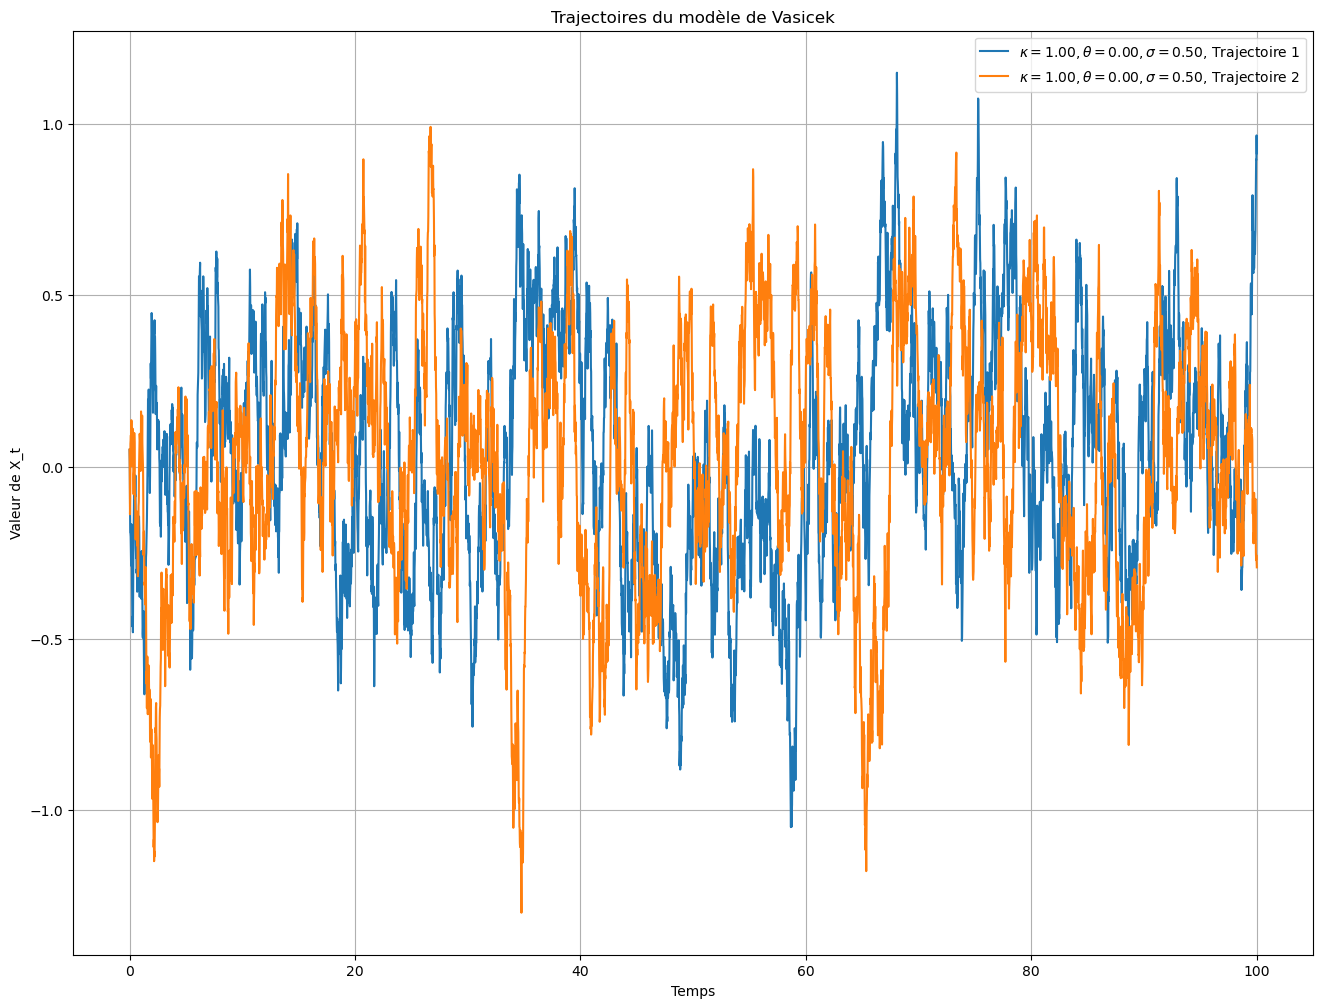

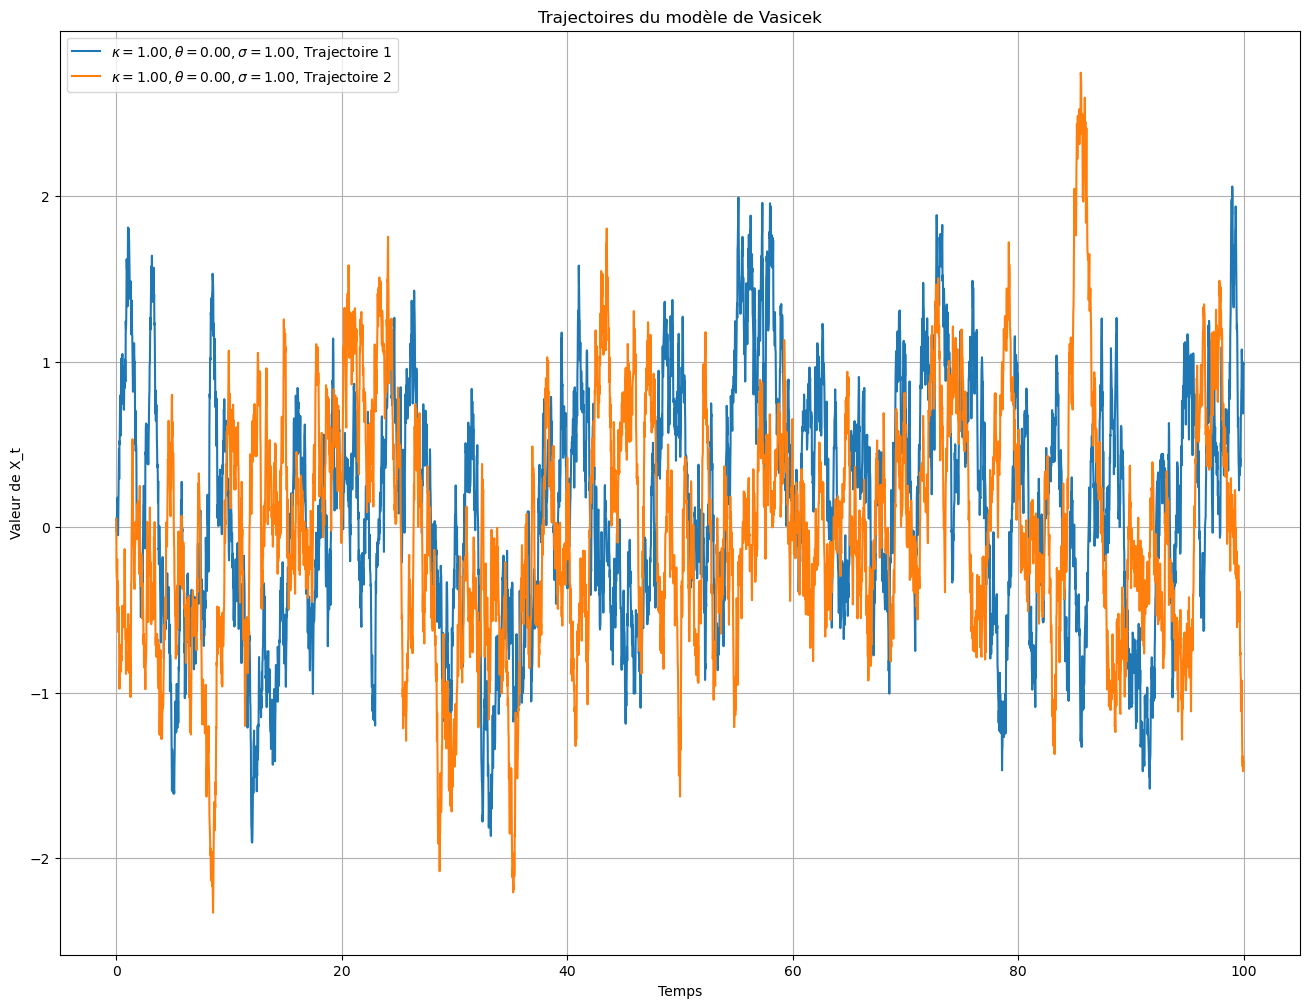

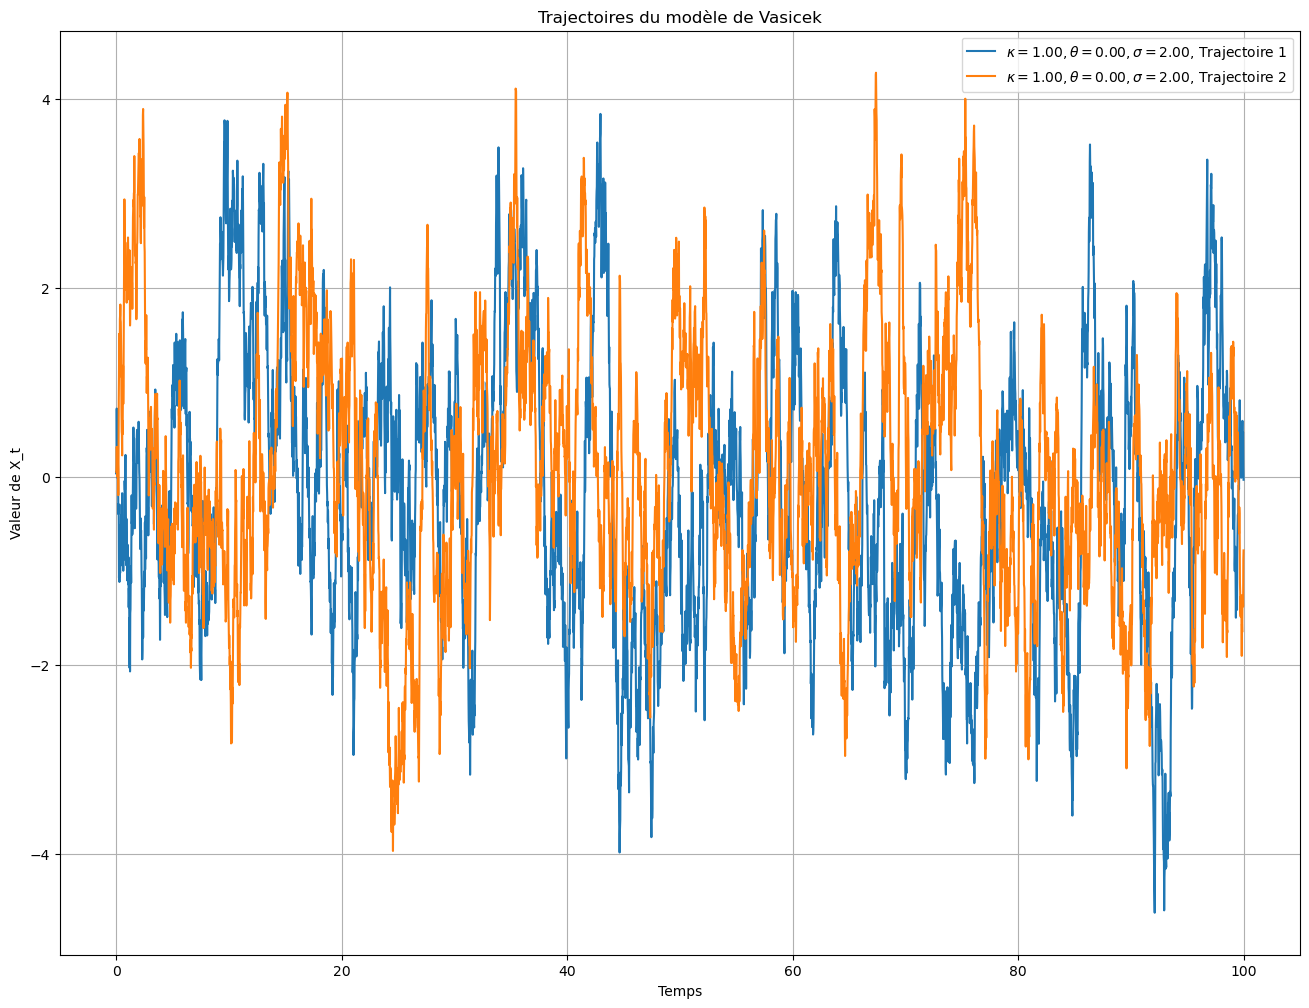

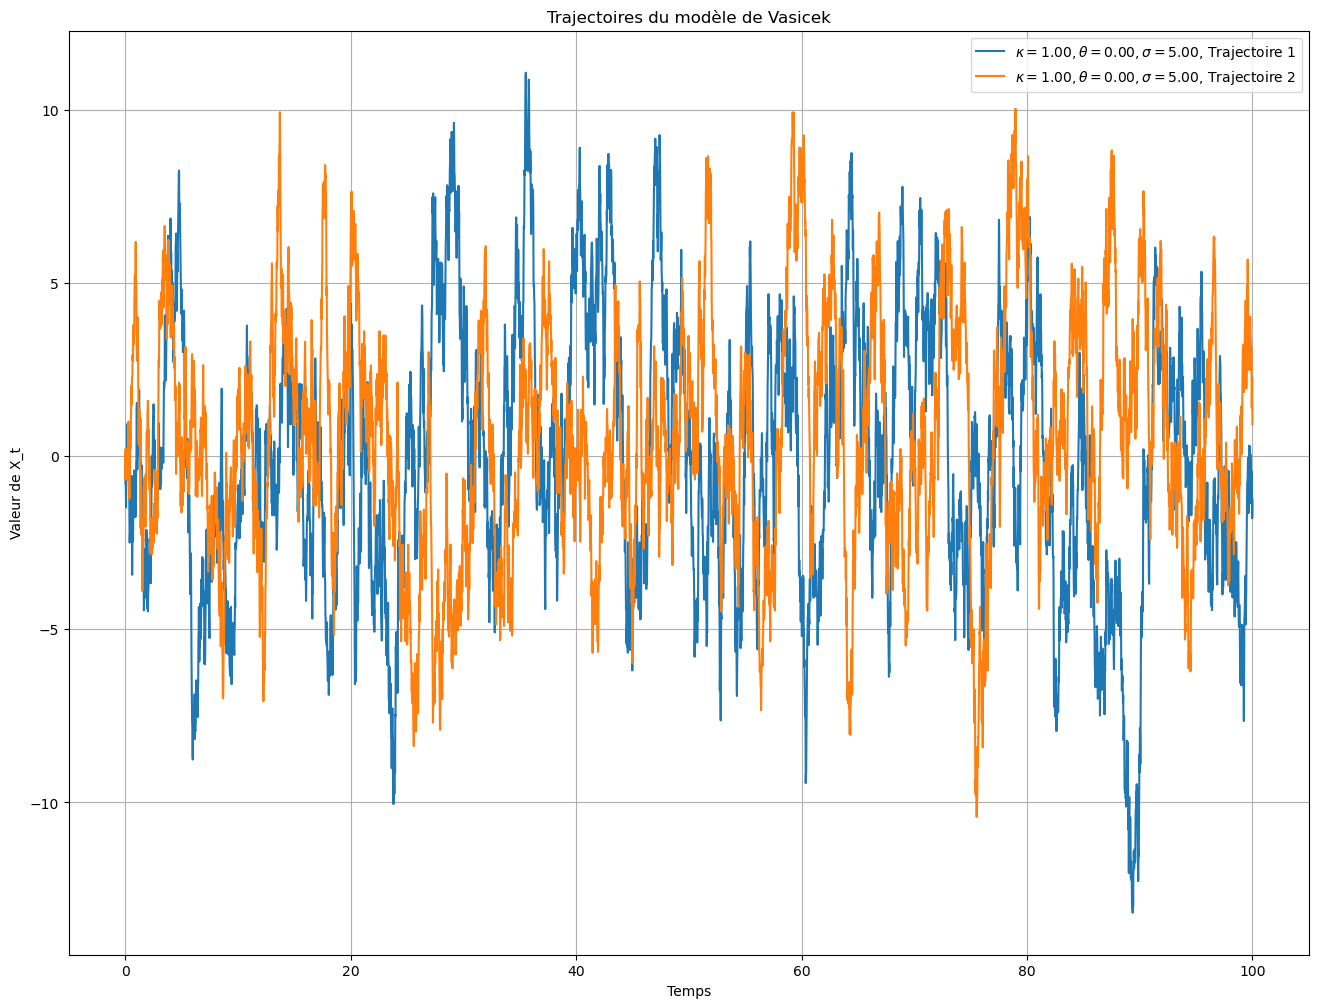

In [11]:
kappa = 1  
theta = 0  
X0 = 0.05  
N = 2  
n = 5000  
T = 100  

sigma_values = [0.5, 1, 2, 5]

for sigma in sigma_values:
    plt.figure(figsize=(16, 12))
    vasicek_process = Vasicek(kappa, theta, sigma)
    
    trajectories = vasicek_process.generate(X0, T, N, n)  
    
    time = np.linspace(0, T, n)
    for i in range(N):
        plt.plot(time, trajectories[i], label=f"$\\kappa = {kappa:.2f}, \\theta = {theta:.2f}, \\sigma = {sigma:.2f}$, Trajectoire {i+1}")
    plt.title("Trajectoires du modèle de Vasicek")
    plt.xlabel("Temps")
    plt.ylabel("Valeur de X_t")
    plt.legend()
    plt.grid(True)
    plt.show()


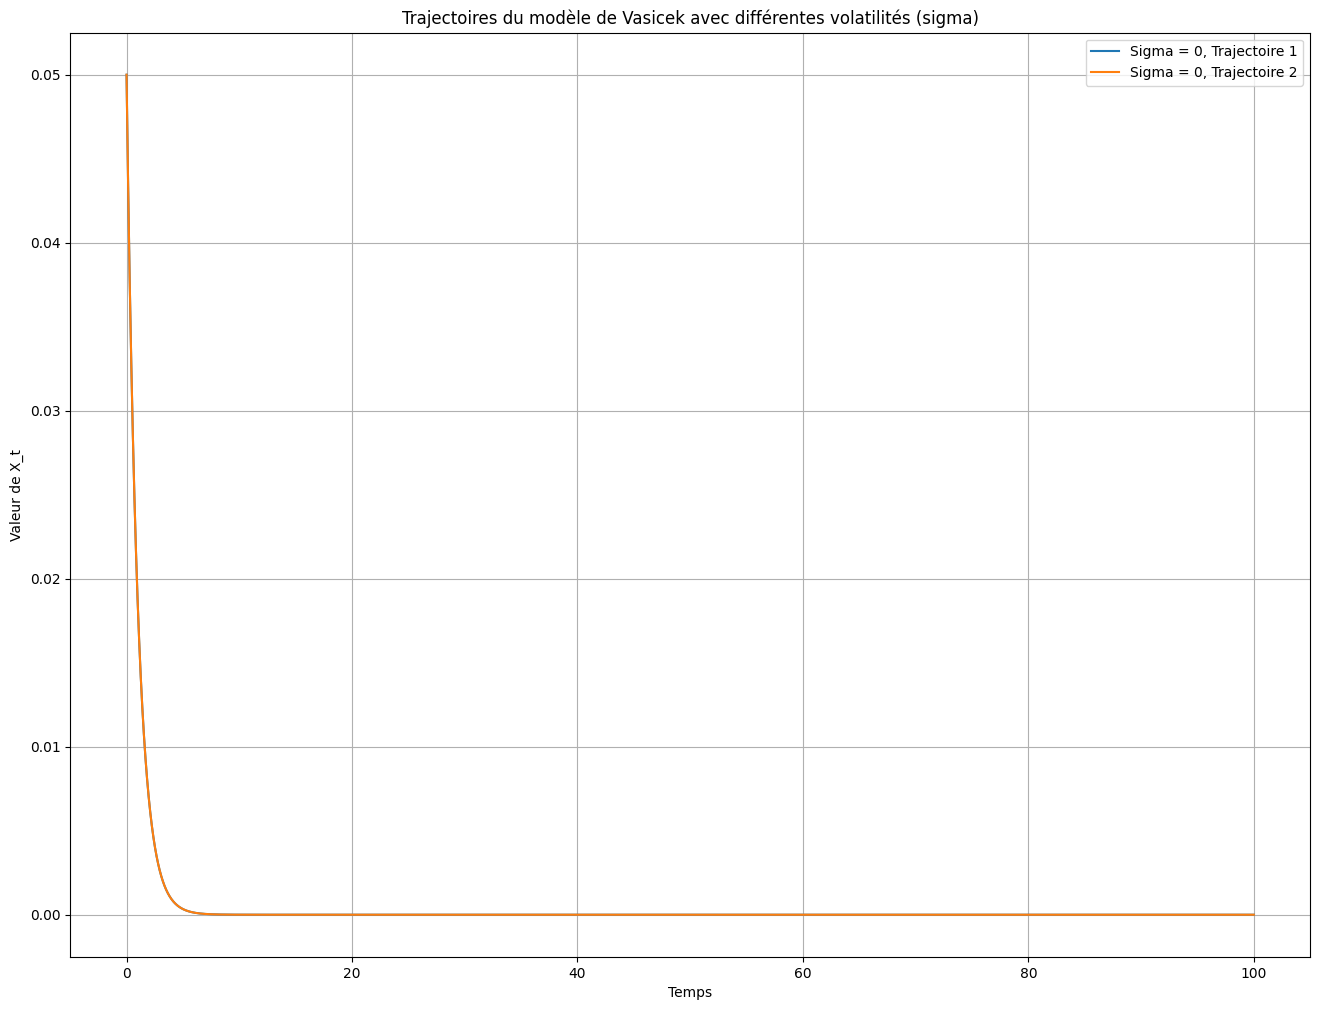

In [4]:
# Paramètres du modèle de Vasicek
kappa = 1  # vitesse de réversion vers la moyenne
theta = 0  # niveau de la moyenne à long terme
X0 = 0.05  # valeur initiale
N = 2  # nombre de trajectoires à générer
n = 5000  # nombre de pas de discrétisation    # Affichage des trajectoires générées pour chaque sigma

T = 100  # durée totale

# Liste des valeurs de sigma
sigma_values = [0]

# Créer un objet de la classe Vasicek et générer les trajectoires pour chaque valeur de sigma
for sigma in sigma_values:
    # Créer un objet avec la valeur de sigma courante
    plt.figure(figsize=(16, 12))
    vasicek_process = Vasicek(kappa, theta, sigma)
    
    # Générer les trajectoires
    trajectories = vasicek_process.generate(X0, T, N, n)  # Correction: Pass X0, T, N, n
    
    # Affichage des trajectoires générées pour chaque sigma
    time = np.linspace(0, T, n)
    for i in range(N):
        plt.plot(time, trajectories[i], label=f"Sigma = {sigma}, Trajectoire {i+1}")
    
    plt.title("Trajectoires du modèle de Vasicek avec différentes volatilités (sigma)")
    plt.xlabel("Temps")
    plt.ylabel("Valeur de X_t")
    plt.legend()
    plt.grid(True)
    plt.show()

La fonction suivante calcule la quantité :
$$\frac{1}{n} \sum_{k=0}^n f(X_{t_k})$$
Il s'agit de la moyenne temporelle du processus sur les $n$ instants.

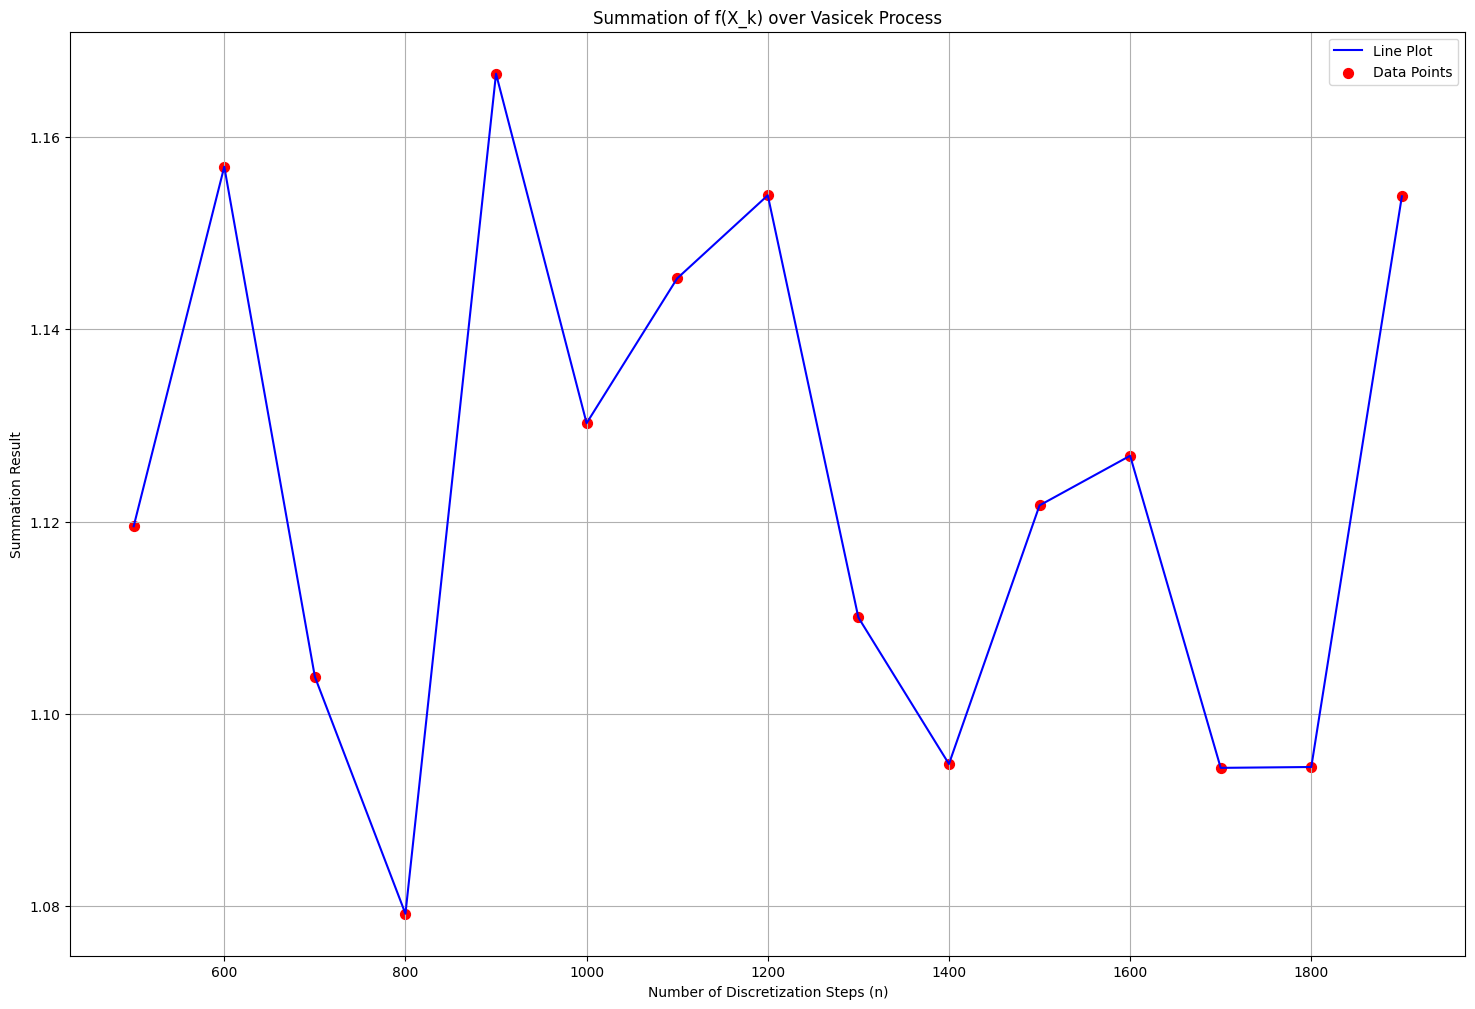

In [5]:
def calculate_sum(n, f, kappa=1, theta=1, sigma=0.5, X0=0.05,T=5000):
    """
    Calculate the summation: (1/n) * sum_{k=0}^n f(X_k), where X_k is generated by the Vasicek model.
    
    :param n: Number of steps in the discretization
    :param f: Function to apply to each X_k
    :param kappa: Speed of mean reversion
    :param theta: Long-term mean level
    :param sigma: Volatility
    :param X0: Initial value of the process
    :return: The computed summation
    """
    vasicek_process = Vasicek(kappa, theta, sigma)
      # Time horizon

    # Generate one trajectory
    trajectories = vasicek_process.generate(X0, T, 1, n)  # One trajectory, n steps
    res = 0
    trajectory = trajectories[0]  # Take the first trajectory
    res +=(1 / n) * sum(f(x) for x in trajectory)
    # Compute the summation
    return res

# Define the function to apply to each X_k
f = lambda x: x**2  # Example: Square of each value

n_values = range(500, 2000, 100)  # Range of n values for testing
Y = [calculate_sum(n, f) for n in n_values]  # Compute the result for each n
# Plot the results
plt.figure(figsize=(18, 12))
plt.plot(n_values, Y, label="Line Plot", color="blue")  # Line plot
plt.scatter(n_values, Y, label="Data Points", color="red", s=50)  # Scatter plot
plt.xlabel("Number of Discretization Steps (n)")
plt.ylabel("Summation Result")
plt.title("Summation of f(X_k) over Vasicek Process")
plt.grid(True)
plt.legend()  # Add a legend to differentiate the line and scatter plots
plt.show()

This function calculates this quantity :
$$\mathbb{E} (X_{\infty}^n)=\sum_{k=0}^n \binom{k}{n} \theta^{n-k} \frac{\sigma^k}{(2 \kappa)^{k/2}} \mathbb{E} (Z^k)$$
where $Z \sim \mathcal{N}(0,1)$

In [6]:
def expected_value_vasicek(power, theta, sigma, kappa):
    """
    Compute the expected value of the Vasicek process at X_n using the closed-form formula.
    
    :param n: Number of steps in the discretization
    :param theta: Long-term mean level
    :param sigma: Volatility
    :param kappa: Speed of mean reversion
    :return: The theoretical expected value
    """
    expected_sum = 0
    for k in range(power + 1):
        # Binomial coefficient
        binom_coeff = comb(power, k)
        
        # Factor for theta and sigma
        theta_factor = theta**(power - k)

        sigma_factor = sigma**k / (2 * kappa)**(k//2)
        
        # Expectation of Z^k
        if k % 2 == 0:  # Even powers of Z
            m = k // 2
            # For even k, the expectation of Z^{2m} is (2m-1)!! = (2m-1)*(2m-3)*...*1
            z_expectation = math.factorial(2 * m) // (2**m * math.factorial(m))  # Double factorial calculation
        else:  # Odd powers of Z
            z_expectation = 0
        
        # Add to the summation
        expected_sum += binom_coeff * theta_factor * sigma_factor * z_expectation
    
    return expected_sum


# Parameters for Vasicek
kappa_true = 1  # True speed of mean reversion
theta_true = 0.5  # True long-term mean
sigma_true = 0.2  # True volatility
n = 2

# Compute theoretical expectation
true_value = expected_value_vasicek(n, theta, sigma, kappa)
print("Theoretical Expected Value:", true_value)


Theoretical Expected Value: 0.0


Theoretical Expected Value: 0.27
Average of computed Summation: 0.2701309349836949


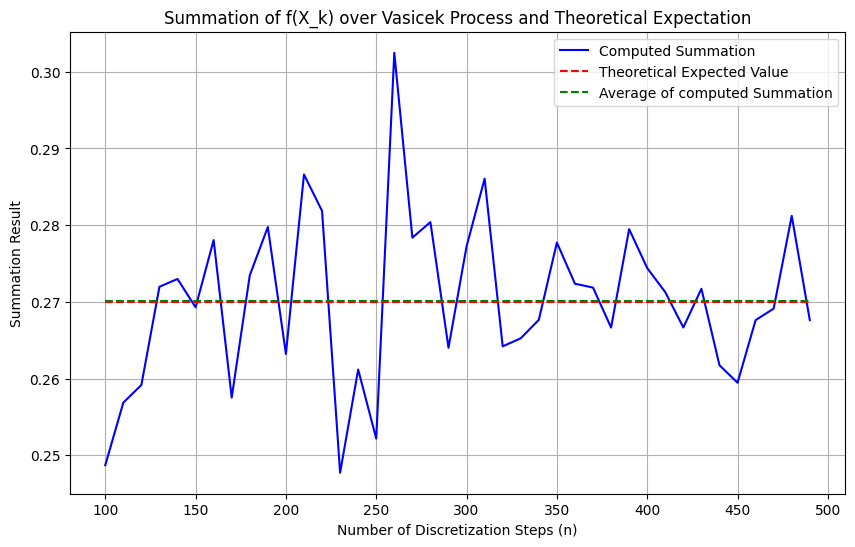

In [7]:
# Example parameters
kappa = 1  # Speed of mean reversion
theta = 1  # Long-term mean level
sigma = 0  # Volatility
X0 = 0.05  # Initial value
N = 1  # Only 1 trajectory for the summation computation
n_values = range(100, 500, 10)  # Range of n values for testing
n = 2 # Choose a large n for comparison

# Define the function to apply to each X_k
f = lambda x: x**n# Example: x^3

# Compute the summation for each value of n
Y = [calculate_sum(n, f, kappa=kappa_true, theta=theta_true, sigma=sigma_true, X0=X0) for n in n_values]
y0 = sum(Y)/len(Y)
# Compute the true value of the expectation
true_value = expected_value_vasicek(n, theta_true, sigma_true, kappa_true)
Y0 = [true_value for _ in n_values]  # Create a constant list for the theoretical expected value
Y1 = [y0 for _ in n_values]
# Print the theoretical expected value
print("Theoretical Expected Value:", true_value)
print("Average of computed Summation:", y0)
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(n_values, Y, label="Computed Summation", color="blue")
plt.plot(n_values, Y0, label="Theoretical Expected Value", color="red", linestyle="--")
plt.plot(n_values, Y1, label="Average of computed Summation", color="green", linestyle="--")
plt.xlabel("Number of Discretization Steps (n)")
plt.ylabel("Summation Result")
plt.title("Summation of f(X_k) over Vasicek Process and Theoretical Expectation")
plt.legend()
plt.grid(True)
plt.show()


# Estimation by "pure" moments

In [8]:
true_theta = 0.155
true_sigma = 0.38
true_kappa = 0.89

from scipy.stats import qmc
from joblib import Parallel, delayed

def empirical_value_vasicek(X, order):
    """Calcule la valeur empirique du moment d'ordre donné."""
    return np.mean(X**order)

def pure_moments_calibration(X, max_order, n_init=10):
    """Calibre les paramètres du modèle de Vasicek en minimisant l'erreur des moments purs."""

    # Moments empiriques
    orders = np.arange(1, max_order + 1)
    y_obs = np.array([empirical_value_vasicek(X, i) for i in orders])

    # Fonction coût vectorisée
    def cost(params):
        theta, sigma, kappa = params
        errors = np.array([expected_value_vasicek(i, theta, sigma, kappa) - y_obs[i-1] for i in orders])
        return np.sum(errors**2)

    # Initialisation
    sampler = qmc.LatinHypercube(d=3)
    initial_samples = qmc.scale(sampler.random(n_init), l_bounds=[0.01, 0.01, 0.01], u_bounds=[1, 1, 1])

    # Optimisation en parallèle
    def optimize_from_guess(guess):
        res = minimize(cost, guess, method='L-BFGS-B', bounds=[(1e-7, None), (1e-7, None), (1e-7, None)])
        return res.x, res.fun

    results = Parallel(n_jobs=-1)(delayed(optimize_from_guess)(guess) for guess in initial_samples)

    # Sélection de la meilleure solution
    best_params, best_cost = min(results, key=lambda x: x[1])

    return *best_params, best_cost

# Paramètres de simulation
n = 252 * T
T = 20
X0 = 0.1
n_simulations = 1000

# Générer les données
vasicek_process = Vasicek(true_kappa, true_theta, true_sigma)
X = vasicek_process.generate(X0, T, n_simulations, n)  # X est de taille (n_simulations, n)

# Calibrer pour chaque ordre et chaque simulation
max_order = 5
n_values = range(3, max_order + 1)

# Structure des résultats
calibration_values = [[pure_moments_calibration(X[i], n) for n in n_values] for i in range(n_simulations)]


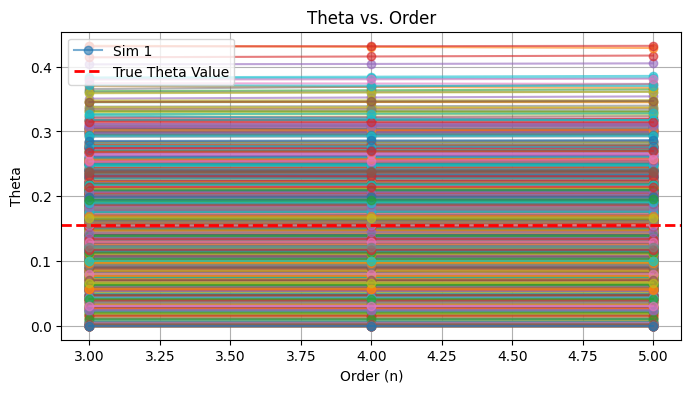

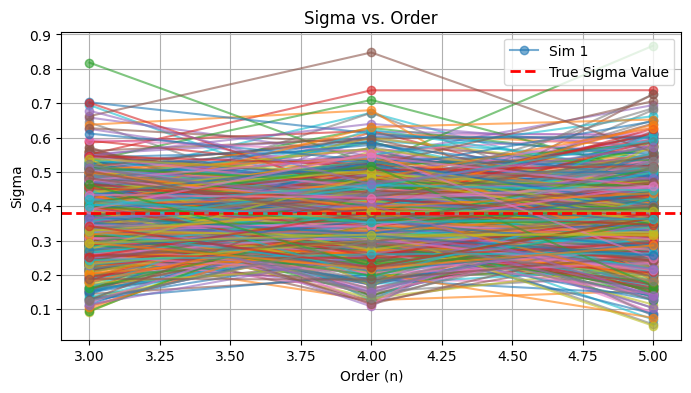

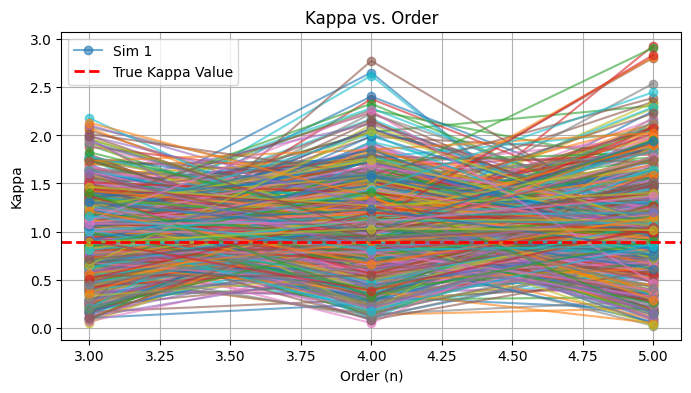

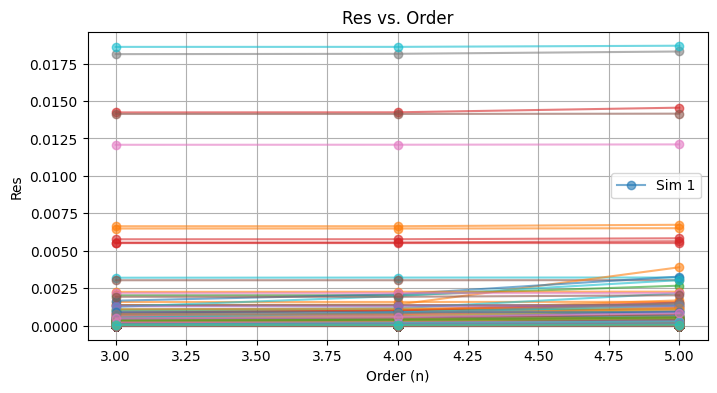

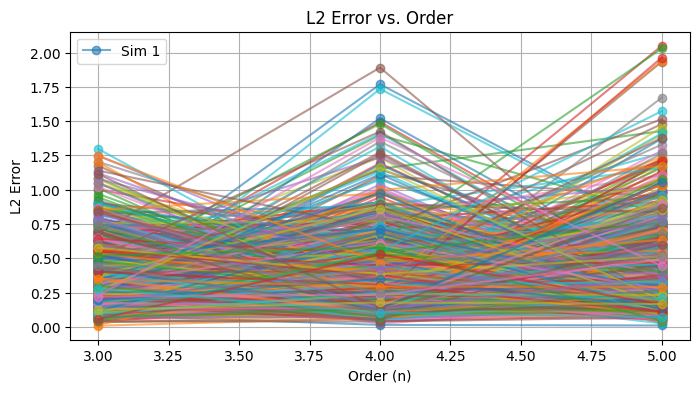

In [9]:
# Extraction des paramètres calibrés
theta_values = np.array([[params[0] for params in sim_values] for sim_values in calibration_values])
sigma_values = np.array([[params[1] for params in sim_values] for sim_values in calibration_values])
kappa_values = np.array([[params[2] for params in sim_values] for sim_values in calibration_values])
res_values = np.array([[params[3] for params in sim_values] for sim_values in calibration_values])

# Calcul du L2 error
l2_errors = np.sqrt(
    (theta_values - true_theta) ** 2 +
    (sigma_values - true_sigma) ** 2 +
    (kappa_values - true_kappa) ** 2
)

# Création d'un dictionnaire pour les paramètres
parameters = {
    'Theta': theta_values,
    'Sigma': sigma_values,
    'Kappa': kappa_values,
    'Res': res_values,
    'L2 Error': l2_errors
}

# Tracé des graphes
for param_name, param_values in parameters.items():
    plt.figure(figsize=(8, 4))

    # Tracer les courbes des 10 simulations
    for sim in range(n_simulations):
        plt.plot(n_values, param_values[sim], marker='o', linestyle='-', alpha=0.6, label=f'Sim {sim+1}' if sim == 0 else None)

    # Ajouter une ligne pour la vraie valeur (si applicable)
    if param_name in ['Theta', 'Sigma', 'Kappa']:
        plt.axhline(y={'Theta': true_theta, 'Sigma': true_sigma, 'Kappa': true_kappa}[param_name], 
                    color='red', linestyle='--', linewidth=2, label=f'True {param_name} Value')

    # Ajout des labels et du titre
    plt.xlabel('Order (n)')
    plt.ylabel(param_name)
    plt.title(f'{param_name} vs. Order')
    plt.legend()
    plt.grid(True)
    plt.show()


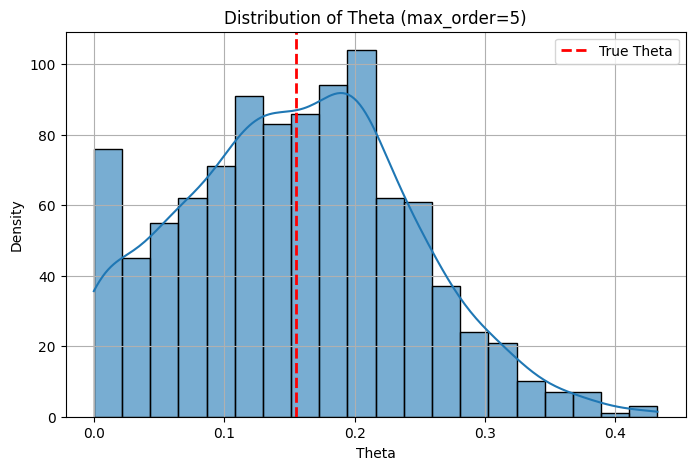

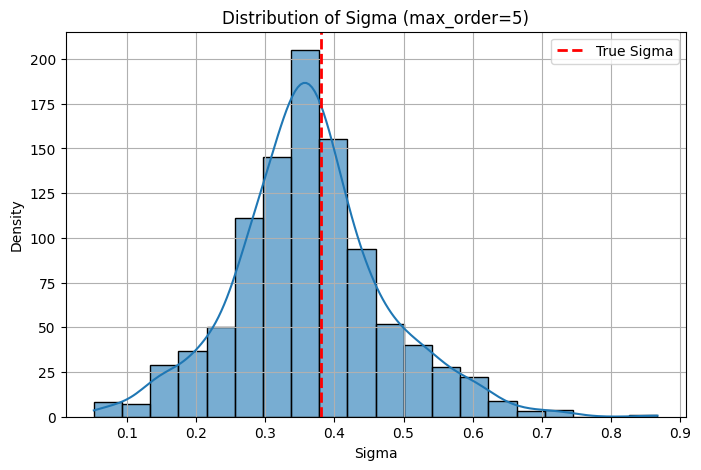

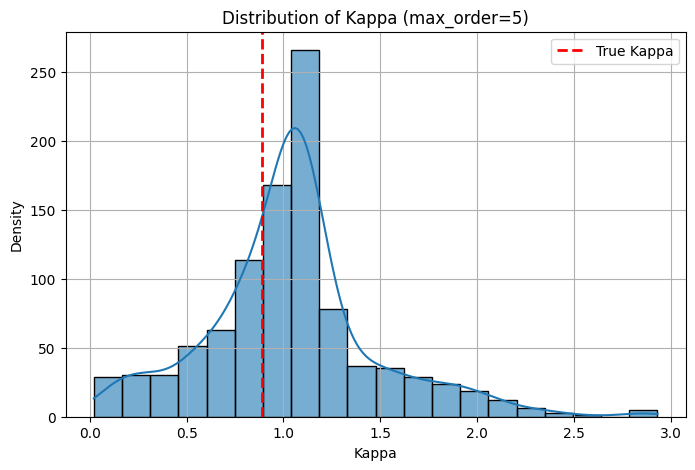

In [10]:
# Paramètres réels
true_values = {'Theta': true_theta, 'Sigma': true_sigma, 'Kappa': true_kappa}

# Extraction des valeurs pour max_order
theta_vals = [calibration_values[i][-1][0] for i in range(n_simulations)]
sigma_vals = [calibration_values[i][-1][1] for i in range(n_simulations)]
kappa_vals = [calibration_values[i][-1][2] for i in range(n_simulations)]

# Structure des paramètres
params = {'Theta': theta_vals, 'Sigma': sigma_vals, 'Kappa': kappa_vals}

# Tracé des histogrammes avec KDE
for param_name, values in params.items():
    plt.figure(figsize=(8, 5))
    
    # Histogramme + KDE
    sns.histplot(values, bins=20, kde=True, edgecolor='black', alpha=0.6)
    
    # Ligne rouge pour la vraie valeur
    plt.axvline(true_values[param_name], color='red', linestyle='--', linewidth=2, label=f'True {param_name}')

    plt.xlabel(param_name)
    plt.ylabel('Density')
    plt.title(f'Distribution of {param_name} (max_order={max_order})')
    plt.legend()
    plt.grid(True)
    plt.show()

According to the paper provided by the tutor, incorporating a weight matrix enhances the estimation by improving its efficiency. The weight matrix allows the method to give more importance to the moments with lower variance, leading to a more accurate and robust parameter estimation.

## How the weight matrix is calculated

On the first step, GMM is performed with an arbitrary weighting matrix. We will use the identity here.  $\newline$
We will then these values to estimate the weight matrix $W.$

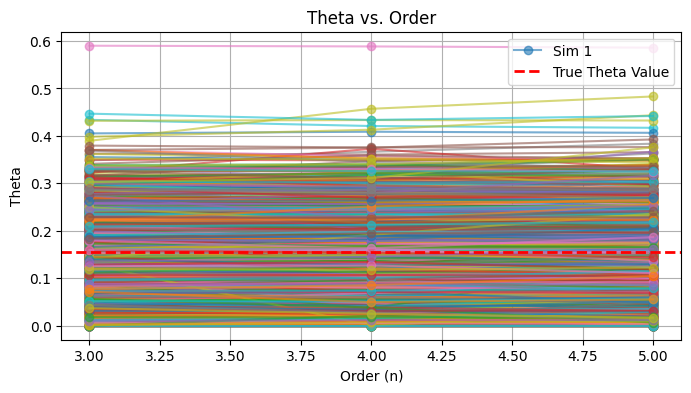

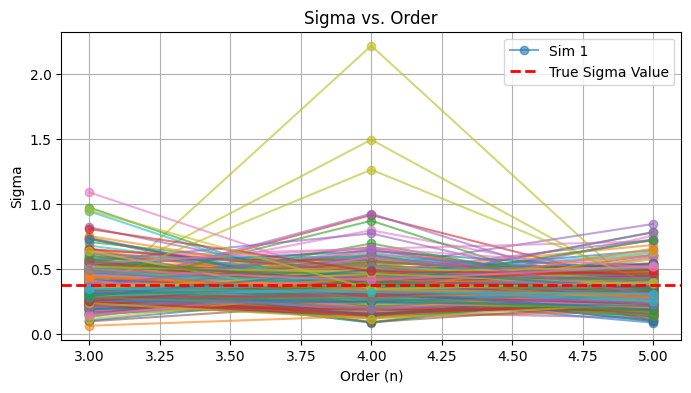

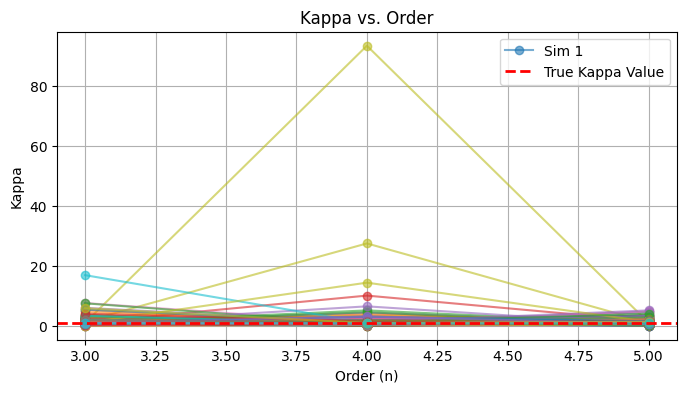

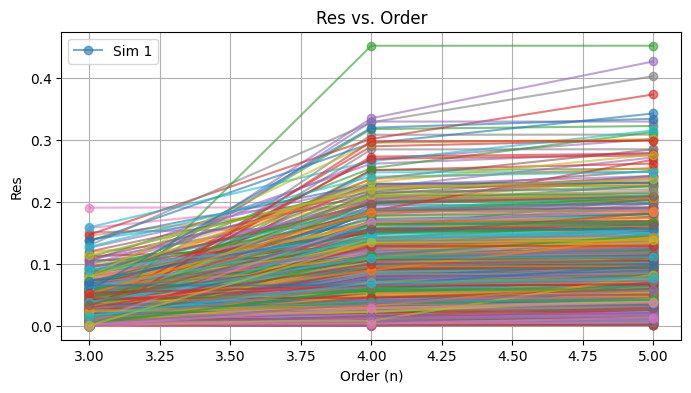

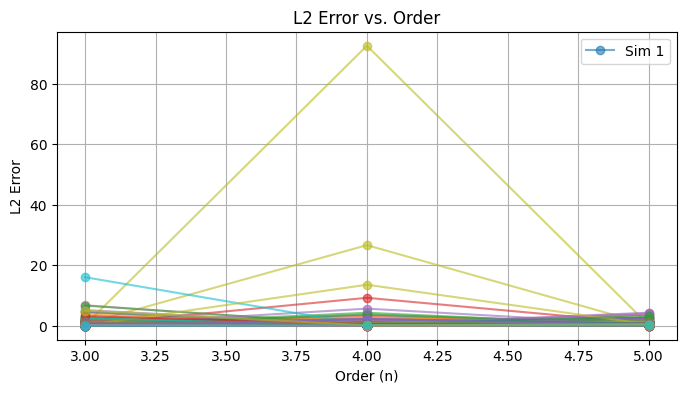

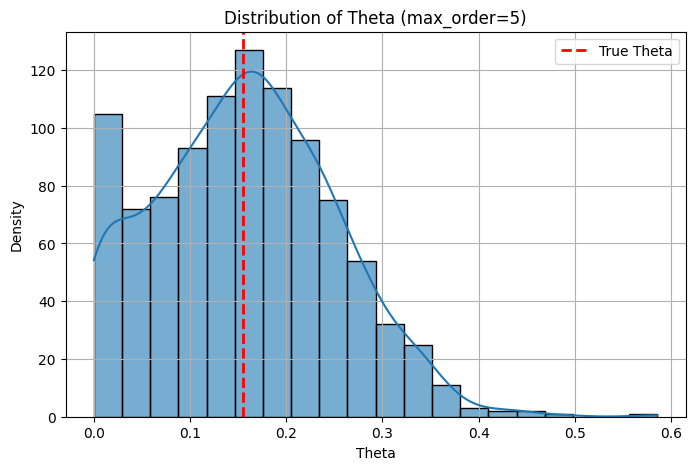

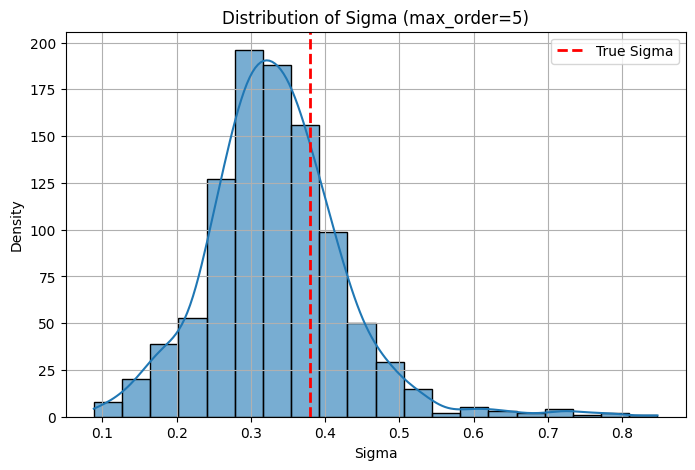

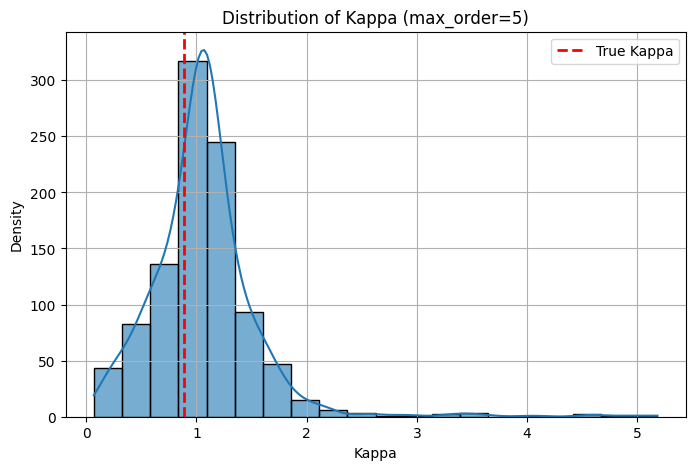

In [11]:
def compute_weight_matrix(X, theta, sigma, kappa, max_order):
    orders = np.arange(1, max_order + 1)
    n = X.shape[0]

    y_model = np.array([expected_value_vasicek(i, theta, sigma, kappa) for i in orders])

    errors = (X[:, None] ** orders[None, :]) - y_model

    S = np.cov(errors, rowvar=False)

    epsilon = 1e-6
    S += epsilon * np.eye(S.shape[0])

    W = np.linalg.inv(S)

    return W

# === Calibration avec 2-step GMM ===

def pure_moments_calibration(X, max_order, n_init=10, W=None, two_step=False):
    orders = np.arange(1, max_order + 1)
    y_obs = np.array([empirical_value_vasicek(X, i) for i in orders])

    if W is None:
        W = np.eye(max_order)

    def cost(params):
        theta, sigma, kappa = params
        y_model = np.array([expected_value_vasicek(i, theta, sigma, kappa) for i in orders])
        errors = y_model - y_obs
        return errors @ W @ errors

    sampler = qmc.LatinHypercube(d=3)
    initial_samples = qmc.scale(sampler.random(n_init), l_bounds=[0.01, 0.01, 0.01], u_bounds=[1, 1, 1])

    def optimize_from_guess(guess):
        res = minimize(cost, guess, method='L-BFGS-B', bounds=[(1e-7, None), (1e-7, None), (1e-7, None)])
        return res.x, res.fun

    results = Parallel(n_jobs=-1)(delayed(optimize_from_guess)(guess) for guess in initial_samples)
    best_params, best_cost = min(results, key=lambda x: x[1])

    if two_step:
        theta_1, sigma_1, kappa_1 = best_params
        W_optimal = compute_weight_matrix(X, theta_1, sigma_1, kappa_1, max_order)
        return pure_moments_calibration(X, max_order, n_init=n_init, W=W_optimal, two_step=False)

    return *best_params, best_cost

# === Paramètres de simulation ===

true_theta = 0.155
true_sigma = 0.38
true_kappa = 0.89

T = 20
n = 252 * T
X0 = 0.1
n_simulations = 1000

vasicek_process = Vasicek(true_kappa, true_theta, true_sigma)
X = vasicek_process.generate(X0, T, n_simulations, n)

# === Calibration pour chaque simulation ===

max_order = 5
n_values = range(3, max_order + 1)

calibration_values = [
    [pure_moments_calibration(X[i], n, two_step=True) for n in n_values]
    for i in range(n_simulations)
]

# === Extraction des paramètres calibrés ===

theta_values = np.array([[params[0] for params in sim_values] for sim_values in calibration_values])
sigma_values = np.array([[params[1] for params in sim_values] for sim_values in calibration_values])
kappa_values = np.array([[params[2] for params in sim_values] for sim_values in calibration_values])
res_values = np.array([[params[3] for params in sim_values] for sim_values in calibration_values])

l2_errors = np.sqrt(
    (theta_values - true_theta)**2 +
    (sigma_values - true_sigma)**2 +
    (kappa_values - true_kappa)**2
)

parameters = {
    'Theta': theta_values,
    'Sigma': sigma_values,
    'Kappa': kappa_values,
    'Res': res_values,
    'L2 Error': l2_errors
}

# === Tracés des graphes ===

for param_name, param_values in parameters.items():
    plt.figure(figsize=(8, 4))
    for sim in range(n_simulations):
        plt.plot(n_values, param_values[sim], marker='o', linestyle='-', alpha=0.6, label=f'Sim {sim+1}' if sim == 0 else None)

    if param_name in ['Theta', 'Sigma', 'Kappa']:
        plt.axhline(y={'Theta': true_theta, 'Sigma': true_sigma, 'Kappa': true_kappa}[param_name],
                    color='red', linestyle='--', linewidth=2, label=f'True {param_name} Value')

    plt.xlabel('Order (n)')
    plt.ylabel(param_name)
    plt.title(f'{param_name} vs. Order')
    plt.legend()
    plt.grid(True)
    plt.show()

# === Histogrammes finales pour max_order ===

true_values = {'Theta': true_theta, 'Sigma': true_sigma, 'Kappa': true_kappa}

theta_vals = [calibration_values[i][-1][0] for i in range(n_simulations)]
sigma_vals = [calibration_values[i][-1][1] for i in range(n_simulations)]
kappa_vals = [calibration_values[i][-1][2] for i in range(n_simulations)]

params = {'Theta': theta_vals, 'Sigma': sigma_vals, 'Kappa': kappa_vals}

for param_name, values in params.items():
    plt.figure(figsize=(8, 5))
    sns.histplot(values, bins=20, kde=True, edgecolor='black', alpha=0.6)
    plt.axvline(true_values[param_name], color='red', linestyle='--', linewidth=2, label=f'True {param_name}')
    plt.xlabel(param_name)
    plt.ylabel('Density')
    plt.title(f'Distribution of {param_name} (max_order={max_order})')
    plt.legend()
    plt.grid(True)
    plt.show()

In [12]:
def empirical_moments(X, max_order):
    return np.array([np.mean(X**i) for i in range(1, max_order + 1)])

def compute_weight_matrix(X, theta, sigma, kappa, max_order):
    orders = np.arange(1, max_order + 1)
    n = X.shape[0]
    y_model = np.array([expected_value_vasicek(i, theta, sigma, kappa) for i in orders])
    errors = (X[:, None] ** orders[None, :]) - y_model
    S = np.cov(errors, rowvar=False)
    epsilon = 1e-6
    S += epsilon * np.eye(S.shape[0])
    W = np.linalg.inv(S)
    return W

def pure_moments_calibration_2step(X, max_order, n_init=10):
    """Calibration Pure Moments avec 2-Step GMM."""
    orders = np.arange(1, max_order + 1)
    y_obs = empirical_moments(X, max_order)
    
    W = np.eye(max_order)

    def cost(params):
        theta, sigma, kappa = params
        y_model = np.array([expected_value_vasicek(i, theta, sigma, kappa) for i in orders])
        errors = y_model - y_obs
        return errors @ W @ errors

    from scipy.stats import qmc
    from scipy.optimize import minimize
    from joblib import Parallel, delayed

    sampler = qmc.LatinHypercube(d=3)
    initial_samples = qmc.scale(sampler.random(n_init), l_bounds=[0.01, 0.01, 0.01], u_bounds=[1, 1, 1])

    def optimize_from_guess(guess):
        res = minimize(cost, guess, method='L-BFGS-B', bounds=[(1e-7, None)] * 3)
        return res.x, res.fun

    results = Parallel(n_jobs=-1)(delayed(optimize_from_guess)(guess) for guess in initial_samples)
    best_params, _ = min(results, key=lambda x: x[1])

    theta_1, sigma_1, kappa_1 = best_params

    # Step 2
    W = compute_weight_matrix(X, theta_1, sigma_1, kappa_1, max_order)

    def cost_step2(params):
        theta, sigma, kappa = params
        y_model = np.array([expected_value_vasicek(i, theta, sigma, kappa) for i in orders])
        errors = y_model - y_obs
        return errors @ W @ errors

    results2 = Parallel(n_jobs=-1)(delayed(optimize_from_guess)(guess) for guess in initial_samples)
    best_params2, best_cost = min(results2, key=lambda x: x[1])

    theta2, sigma2, kappa2 = best_params2
    return theta2, sigma2, kappa2, best_cost

## Estimation by First and Second-Order Moments

Here, I will present my theoretical results used for estimation in the Vasicek model.  
I used only the first two moments to estimate both $\sigma$ and $\kappa $. We will later see if we can improve this method.

$$
\bar{\theta} = \frac{1}{n} \sum_{i=1}^{n} X_i
$$

Let us define:

$$
X_0 = \bar{\theta}^2 - \frac{1}{n} \sum_{i=1}^{n} X_i X_{i+1}
$$

$$
X_1 = \bar{\theta}^2 - \frac{1}{n} \sum_{i=1}^{n} X_i X_{i+2}
$$

$$
h = \frac{T}{n}
$$
# Objective Function Minimization
The objective function is:
$$
L(\kappa, \sigma^2) = \left( \frac{\sigma^2}{2\kappa} e^{-\kappa h} - X_0 \right)^2 + \left( \frac{\sigma^2}{2\kappa} e^{-2\kappa h} - X_1 \right)^2 
$$



This is clearly achieved when :
$$\frac{\sigma^2}{2\kappa} e^{-\kappa h} - X_0  = 0 $$
and 
$$ \frac{\sigma^2}{2\kappa} e^{-2\kappa h} - X_1 =  0 $$

$$ e^{-\kappa h} = \frac{X_1}{X_0} $$
$$ \sigma ^2  = 2 \kappa  X_0 e^{\kappa h} = \frac{2 \kappa X_0^2}{X_1} $$


Finally, we have these results : 
$$\bar{\kappa} = \frac{1}{h} \ln( {\frac{(\frac{1}{n} \sum_{i=1}^{n} X_i)^2 - \frac{1}{n} \sum_{i=1}^{n} X_i X_{i+1}}{(\frac{1}{n} \sum_{i=1}^{n} X_i)^2 - \frac{1}{n} \sum_{i=1}^{n} X_i X_{i+2}}})$$
$\newline$

$$\bar {\sigma^2} = 2 \bar {\kappa} \frac{((\frac{1}{n} \sum_{i=1}^{n} X_i)^2 - \frac{1}{n} \sum_{i=1}^{n} X_i X_{i+1})^2}{(\frac{1}{n} \sum_{i=1}^{n} X_i)^2 - \frac{1}{n} \sum_{i=1}^{n} X_i X_{i+2}}$$
$$\bar{\theta} = \frac{1}{n} \sum_{i=1}^{n} X_i$$

This is done with the normal moments method. We should of course extend this to the generalized method of moments and with lag terms.
An intersting property we have here is, 
$$
\left(\sigma e^{-\kappa(t_{k+1}-t_k)} \int_{t_k}^{t_{k+1}} e^{-\kappa(t-s)} \, dW_s\right)_k
$$
are i.i.d. with law :
$$
\mathcal{N}\!\left(0, \frac{\sigma^2}{2\kappa}\Bigl(1 - e^{-2\kappa h}\Bigr)\right),
$$
where $(h = t_{k+1} - t_k).$

$$
X_{t_j} \mid X_{t_i} \sim \mathcal{N}\!\left( e^{-\kappa (t_j-t_i)} X_{t_i} + \theta\Bigl(1 - e^{-\kappa (t_j-t_i)}\Bigr), \; \frac{\sigma^2}{2\kappa}\Bigl(1 - e^{-2\kappa (t_j-t_i)}\Bigr) \right).
$$

Here we do the implementation of the estimator of the vasicek model by using the forumlas found below for $\kappa,\sigma,\theta.$
$\newline$
These formulas were proved using the first and second lagging terms and the mean to estimate $\theta$.

I will add to that the estiamation using the first 3 pure moments after and inversing the functions.

I wil try after that to add a weight Matrix $W$ that will make the estimation way better.

According to the paper we have on GMM, we have this result we could apply into our model : 
Under some conditions we have : 
$$
\hat{\theta}_T \xrightarrow{p} \theta_0;

\newline

T^{1/2}(\hat{\theta}_T - \theta_0) \xrightarrow{d} N(0, V)
$$
where
$$

V = \left[ G(\theta_0)^T W G(\theta_0) \right]^{-1} G(\theta_0)^T W S(\theta_0) W G(\theta_0) \left[ G(\theta_0)^T W G(\theta_0) \right]^{-1}
\newline
$$

$$
\newline
S(\theta) = \lim_{T \to \infty} \operatorname{Var} \left[ T^{1/2} g_T (\theta) \right].
\newline
\hat {\theta}_T = (\hat{\kappa},\hat{\theta},\hat{\sigma ^2})
$$
$$ f(v_T,\theta) $$
is a q vector function where
 $$ \mathbb{E}(f(v_T,\theta))=0 $$


In [13]:
# True Vasicek parameters
true_theta = 0.155
true_sigma = 0.38
true_kappa = 0.89
T = 100         # Total time period
n_simulations = 1000  # Number of simulations
n_points = 5000       # Number of discretization steps per trajectory

def moment_estimators(X, T):
    h = T / len(X)
    n = len(X) - 2  
    mean_X = np.mean(X)
    sum_X = np.sum(X[:-1]) / n
    sum_X_X1 = np.sum(X[:-1] * X[1:]) / n
    sum_X_X2 = np.sum(X[:-2] * X[2:]) / n
    
    numerator = (sum_X ** 2 - sum_X_X1)
    denominator = (sum_X ** 2 - sum_X_X2)
    
    kappa_hat = (1 / h) * np.log(numerator / denominator)
    sigma2_hat = -2 * kappa_hat * (numerator ** 2) / denominator  
    theta_hat = mean_X
    
    return theta_hat, sigma2_hat, kappa_hat

# Run simulations
theta_estimates, sigma_estimates, kappa_estimates = [], [], []

for _ in range(n_simulations):
    vasicek_process = Vasicek(true_kappa, true_theta, true_sigma)
    X = vasicek_process.generate(X0=0.1, T=T, N=1, n=n_points)[0]
    theta_hat, sigma2_hat, kappa_hat = moment_estimators(X, T)
    theta_estimates.append(theta_hat)
    sigma_estimates.append(np.sqrt(sigma2_hat))  # Convert variance to standard deviation
    kappa_estimates.append(kappa_hat)

# Compute empirical mean and variance
theta_mean, theta_var = np.mean(theta_estimates), np.var(theta_estimates, ddof=1)
sigma_mean, sigma_var = np.mean(sigma_estimates), np.var(sigma_estimates, ddof=1)
kappa_mean, kappa_var = np.mean(kappa_estimates), np.var(kappa_estimates, ddof=1)

print(f"θ Estimate: Mean = {theta_mean:.5f}, Variance = {theta_var:.5f}, True theta = {true_theta:.5f}")
print(f"σ Estimate: Mean = {sigma_mean:.5f}, Variance = {sigma_var:.5f}, True sigma = {true_sigma:.5f}")
print(f"κ Estimate: Mean = {kappa_mean:.5f}, Variance = {kappa_var:.5f}, True kappa = {true_kappa:.5f}")  

θ Estimate: Mean = 0.15408, Variance = 0.00185, True theta = 0.15500
σ Estimate: Mean = 0.38125, Variance = 0.00005, True sigma = 0.38000
κ Estimate: Mean = 0.93490, Variance = 0.02045, True kappa = 0.89000


In [14]:
# Theoretical covariance function
def theoretical_covariance(h, kappa, sigma):
    return (sigma**2 / (2 * kappa)) * np.exp(-kappa * h)

# Empirical covariance function
def empirical_covariance(X, n, T, theta_emp, h):
    k0 = int(n * h / T)  # Convert lag h to index
    cov = 0
    for k in range(n - k0):
        cov += (X[k] * X[k + k0]) / (n - k0)
    return cov - theta_emp**2

# Function to estimate kappa and sigma using minimization
def estimate_kappa_sigma(X, n, T, theta_emp, lags):
    # Compute empirical covariance for the given lags
    covariances = np.array([empirical_covariance(X, n, T, theta_emp, h) for h in lags])

    # Loss function to minimize
    def loss(params):
        kappa, sigma = params
        return np.sum((covariances - theoretical_covariance(lags, kappa, sigma)) ** 2)

    # Initial guesses and bounds
    bounds = [(1e-6, None), (1e-6, None)]  # Ensure positive kappa and sigma

    # Use multiple random initializations
    best_params = None
    best_loss = float('inf')
    for _ in range(10):
        initial_guess = np.random.uniform(0.1, 1, size=2)  # Randomized start points
        res = minimize(loss, initial_guess, method='L-BFGS-B', bounds=bounds)
        if res.fun < best_loss:
            best_loss = res.fun
            best_params = res.x

    return best_params[0], best_params[1]


In [15]:
# True parameters
kappa_true = 0.892  # Vitesse de retour à la moyenne
theta_true = 0.28  # Moyenne long-terme
sigma_true = 0.23  # Volatilité

# Generate Vasicek process trajectories
vasicek_process = Vasicek(kappa_true, theta_true, sigma_true)
X0 = 0.1  # Initial value
n_simulations = 1000  # Number of trajectories
T =  20   # Time horizon
n = 252 * T  # Number of time steps
trajectories = vasicek_process.generate(X0, T, n_simulations, n)


In [16]:
# Estimate parameters for each simulation
estimated_params = []
num_lags = 6
lags = np.array([i * T / n for i in range(num_lags)])  # Define lags

for X in trajectories:
    theta_emp = np.mean(X)  # Estimate theta as empirical mean
    kappa_hat, sigma_hat = estimate_kappa_sigma(X, n, T, theta_emp, lags)
    estimated_params.append((kappa_hat, theta_emp, sigma_hat))

# Convert results to NumPy array
estimated_params = np.array(estimated_params)

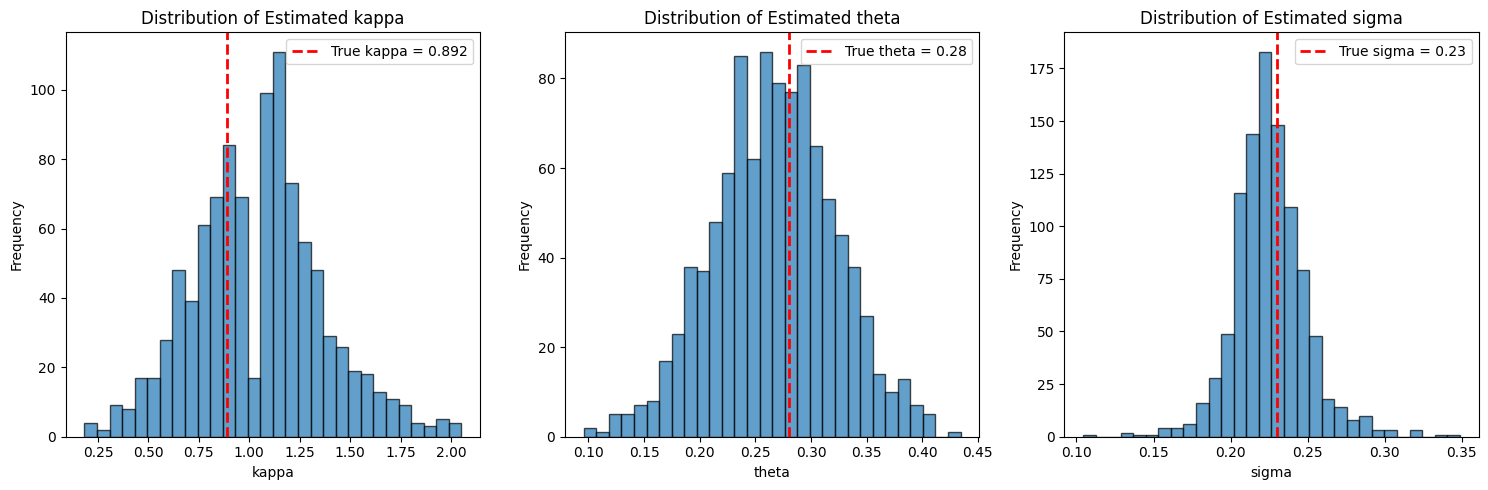

In [17]:
# Plot histograms
plt.figure(figsize=(15, 5))

# Histogram for kappa
plt.subplot(1, 3, 1)
plt.hist(estimated_params[:, 0], bins=30, edgecolor='black', alpha=0.7)
plt.axvline(kappa_true, color='red', linestyle='dashed', linewidth=2, label=f'True kappa = {kappa_true}')
plt.xlabel('kappa')
plt.ylabel('Frequency')
plt.title('Distribution of Estimated kappa')
plt.legend()

# Histogram for theta
plt.subplot(1, 3, 2)
plt.hist(estimated_params[:, 1], bins=30, edgecolor='black', alpha=0.7)
plt.axvline(theta_true, color='red', linestyle='dashed', linewidth=2, label=f'True theta = {theta_true}')
plt.xlabel('theta')
plt.ylabel('Frequency')
plt.title('Distribution of Estimated theta')
plt.legend()

# Histogram for sigma
plt.subplot(1, 3, 3)
plt.hist(estimated_params[:, 2], bins=30, edgecolor='black', alpha=0.7)
plt.axvline(sigma_true, color='red', linestyle='dashed', linewidth=2, label=f'True sigma = {sigma_true}')
plt.xlabel('sigma')
plt.ylabel('Frequency')
plt.title('Distribution of Estimated sigma')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


In [18]:
# Fonction pour la covariance théorique
def theoretical_covariance(h, kappa, sigma):
    return (sigma**2 / (2 * kappa)) * np.exp(-kappa * h)

# Fonction pour la covariance empirique
def empirical_covariance(X, n, T, theta_emp, h):
    k0 = int(n * h / T)
    cov = 0
    for k in range(n - k0):
        cov += (X[k] * X[k + k0]) / (n - k0)
    return cov - theta_emp**2

# Estimation par Covariance 2-Step
def covariance_2step_estimation(X, n, T, theta_emp, lags):
    # Step 1 : estimation initiale classique
    def loss_step1(params):
        kappa, sigma = params
        return np.sum((np.array([empirical_covariance(X, n, T, theta_emp, h) for h in lags])
                       - theoretical_covariance(lags, kappa, sigma)) ** 2)

    bounds = [(1e-6, None), (1e-6, None)]
    best_loss = float('inf')
    best_params = None

    for _ in range(10):
        initial_guess = np.random.uniform(0.1, 1, size=2)
        res = minimize(loss_step1, initial_guess, method='L-BFGS-B', bounds=bounds)
        if res.fun < best_loss:
            best_loss = res.fun
            best_params = res.x

    kappa_init, sigma_init = best_params

    # Step 2 : recalcul avec poids optimaux
    empirical_covs = np.array([empirical_covariance(X, n, T, theta_emp, h) for h in lags])
    theoretical_covs = theoretical_covariance(lags, kappa_init, sigma_init)
    errors = empirical_covs - theoretical_covs

    S = np.outer(errors, errors)
    epsilon = 1e-6
    S += epsilon * np.eye(len(lags))
    W = np.linalg.inv(S)

    def loss_step2(params):
        kappa, sigma = params
        model_covs = theoretical_covariance(lags, kappa, sigma)
        diff = empirical_covs - model_covs
        return diff @ W @ diff

    best_loss2 = float('inf')
    best_params2 = None

    for _ in range(10):
        initial_guess = np.random.uniform(0.1, 1, size=2)
        res = minimize(loss_step2, initial_guess, method='L-BFGS-B', bounds=bounds)
        if res.fun < best_loss2:
            best_loss2 = res.fun
            best_params2 = res.x

    kappa_final, sigma_final = best_params2

    return kappa_final, sigma_final



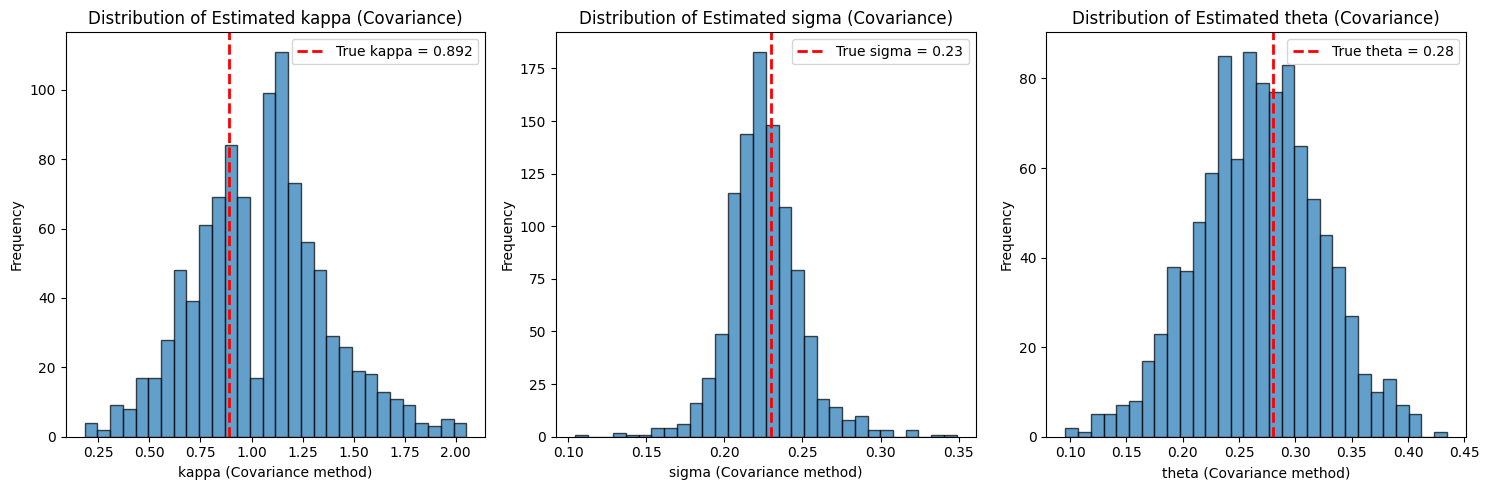

In [19]:
from scipy.stats import qmc
from scipy.optimize import minimize

def pure_moments_calibration_2step(X, max_order=6, n_init=10):
    orders = np.arange(1, max_order + 1)
    y_obs = np.array([empirical_value_vasicek(X, i) for i in orders])

    W = np.eye(max_order)

    def cost(params):
        theta, sigma, kappa = params
        y_model = np.array([expected_value_vasicek(i, theta, sigma, kappa) for i in orders])
        errors = y_model - y_obs
        return errors @ W @ errors

    
    sampler = qmc.LatinHypercube(d=3)
    initial_samples = qmc.scale(sampler.random(n_init), l_bounds=[0.01, 0.01, 0.01], u_bounds=[1, 1, 1])

    results = [minimize(cost, guess, method='L-BFGS-B', bounds=[(1e-7, None)] * 3) for guess in initial_samples]
    best_params = min(results, key=lambda x: x.fun).x

    theta1, sigma1, kappa1 = best_params

    # Step 2
    W = compute_weight_matrix(X, theta1, sigma1, kappa1, max_order)

    def cost_step2(params):
        theta, sigma, kappa = params
        y_model = np.array([expected_value_vasicek(i, theta, sigma, kappa) for i in orders])
        errors = y_model - y_obs
        return errors @ W @ errors

    results2 = [minimize(cost_step2, guess, method='L-BFGS-B', bounds=[(1e-7, None)] * 3) for guess in initial_samples]
    best_params2 = min(results2, key=lambda x: x.fun).x

    return best_params2  # theta, sigma, kappa

# === Estimer avec Pure Moments 2-Step sur les mêmes trajectoires ===

pure_moments_params = []

for X in trajectories:
    theta_hat, sigma_hat, kappa_hat = pure_moments_calibration_2step(X, max_order=6)
    pure_moments_params.append((kappa_hat, theta_hat, sigma_hat))

pure_moments_params = np.array(pure_moments_params)

# === Tracer les résultats ===

plt.figure(figsize=(15, 5))

# Histogram for kappa
plt.subplot(1, 3, 1)
plt.hist(estimated_params[:, 0], bins=30, edgecolor='black', alpha=0.7)
plt.axvline(kappa_true, color='red', linestyle='dashed', linewidth=2, label=f'True kappa = {kappa_true}')
plt.xlabel('kappa (Covariance method)')
plt.ylabel('Frequency')
plt.title('Distribution of Estimated kappa (Covariance)')
plt.legend()



# Histogram for theta
plt.subplot(1, 3, 3)
plt.hist(estimated_params[:, 1], bins=30, edgecolor='black', alpha=0.7)
plt.axvline(theta_true, color='red', linestyle='dashed', linewidth=2, label=f'True theta = {theta_true}')
plt.xlabel('theta (Covariance method)')
plt.ylabel('Frequency')
plt.title('Distribution of Estimated theta (Covariance)')
plt.legend()


# Histogram for sigma
plt.subplot(1, 3, 2)
plt.hist(estimated_params[:, 2], bins=30, edgecolor='black', alpha=0.7)
plt.axvline(sigma_true, color='red', linestyle='dashed', linewidth=2, label=f'True sigma = {sigma_true}')
plt.xlabel('sigma (Covariance method)')
plt.ylabel('Frequency')
plt.title('Distribution of Estimated sigma (Covariance)')
plt.legend()


plt.tight_layout()
plt.show()

In [20]:
# === Comparaison Statistique des Méthodes ===

import pandas as pd

pure_moments_params = np.array(pure_moments_params)
# Résultats pour méthode basée sur la covariance
cov_kappa_mean, cov_kappa_var = np.mean(estimated_params[:, 0]), np.var(estimated_params[:, 0], ddof=1)
cov_theta_mean, cov_theta_var = np.mean(estimated_params[:, 1]), np.var(estimated_params[:, 1], ddof=1)
cov_sigma_mean, cov_sigma_var = np.mean(estimated_params[:, 2]), np.var(estimated_params[:, 2], ddof=1)

# Résultats pour pure moments 2-step
pm_kappa_mean, pm_kappa_var = np.mean(pure_moments_params[:, 0]), np.var(pure_moments_params[:, 0], ddof=1)
pm_theta_mean, pm_theta_var = np.mean(pure_moments_params[:, 1]), np.var(pure_moments_params[:, 1], ddof=1)
pm_sigma_mean, pm_sigma_var = np.mean(pure_moments_params[:, 2]), np.var(pure_moments_params[:, 2], ddof=1)

# Regrouper dans un tableau
summary = pd.DataFrame({
    'Method': ['Covariance', 'Pure Moments 2-Step'],
    'Kappa Mean': [cov_kappa_mean, pm_kappa_mean],
    'Kappa Variance': [cov_kappa_var, pm_kappa_var],
    'Theta Mean': [cov_theta_mean, pm_theta_mean],
    'Theta Variance': [cov_theta_var, pm_theta_var],
    'Sigma Mean': [cov_sigma_mean, pm_sigma_mean],
    'Sigma Variance': [cov_sigma_var, pm_sigma_var],
})

# Affichage propre
print("\n=== Résumé statistique des estimations ===\n")
print(summary.to_string(index=False))



=== Résumé statistique des estimations ===

             Method  Kappa Mean  Kappa Variance  Theta Mean  Theta Variance  Sigma Mean  Sigma Variance
         Covariance    1.046338        0.104548    0.267367        0.002994    0.225293        0.000563
Pure Moments 2-Step    1.169747        2.441090    0.263986        0.003064    0.215758        0.004054


Empirical theta is: 0.23697257297079272
True theta is: 0.258
Number of Lags:  2
Number of Lags:  3
Number of Lags:  4
Number of Lags:  5
Number of Lags:  6
Number of Lags:  7
Number of Lags:  8
Number of Lags:  9
Number of Lags:  10
Number of Lags:  11
Number of Lags:  12
Number of Lags:  13
Number of Lags:  14
Number of Lags:  15
Number of Lags:  16
Number of Lags:  17
Number of Lags:  18
Number of Lags:  19
Number of Lags:  20
Number of Lags:  21
Number of Lags:  22
Number of Lags:  23
Number of Lags:  24


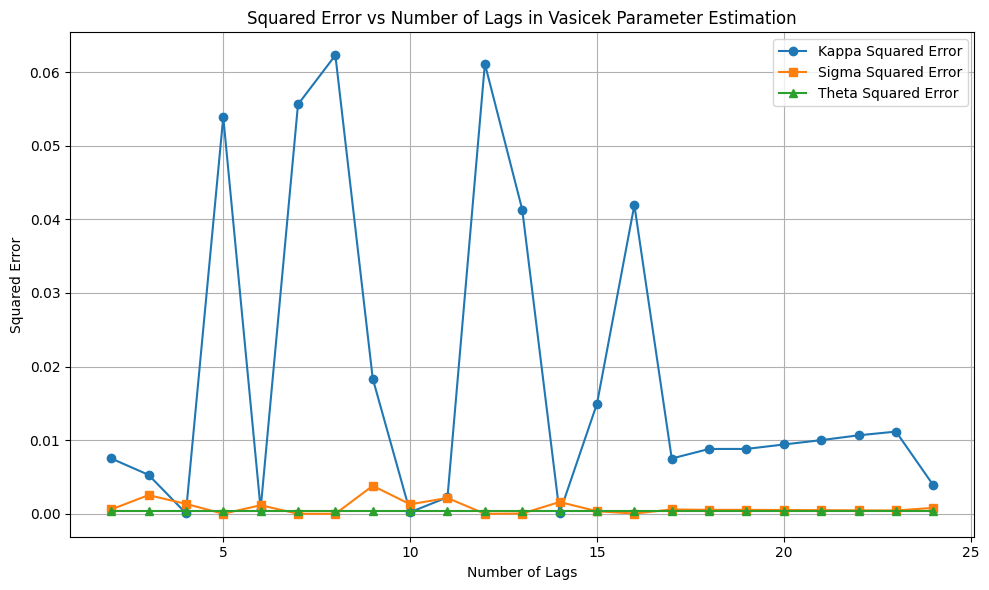

True kappa is: 0.892
True sigma is: 0.33
Estimated kappa is: 0.9542419470642319
Estimated sigma is: 0.30165950725090324


In [21]:
# Compute empirical mean
kappa_true = 0.892  # Vitesse de retour à la moyenne
theta_true = 0.258  # Moyenne long-terme
sigma_true = 0.33  # Volatilité

vasicek_process = Vasicek(kappa_true, theta_true, sigma_true)
 
T = 20   
n = 252*20
N = 1
trajectories = vasicek_process.generate(X0, T, N, n)

# Empirical estimate of theta
trajectory = trajectories[0]
theta_emp = np.mean(trajectory)
print("Empirical theta is:", theta_emp)
print("True theta is:", theta_true)

# Range of lags
num_lags_list = np.arange(2, 25, 1)
kappa_sq_errors = []
sigma_sq_errors = []
theta_sq_errors = []

kappa_est = -1
sigma_est = -1

# Loop over different numbers of lags
for num_lags in num_lags_list:
    print("Number of Lags: ", num_lags)
    lags = np.array([i * T / n for i in range(num_lags)])
    
    kappa_est, sigma_est = estimate_kappa_sigma(trajectory, n, T, theta_emp, lags)
    
    # Squared errors
    kappa_sq_errors.append((kappa_est - kappa_true) ** 2)
    sigma_sq_errors.append((sigma_est - sigma_true) ** 2)
    theta_sq_errors.append((theta_emp - theta_true) ** 2)

# Plotting squared errors
plt.figure(figsize=(10, 6))
plt.plot(num_lags_list, kappa_sq_errors, label='Kappa Squared Error', marker='o')
plt.plot(num_lags_list, sigma_sq_errors, label='Sigma Squared Error', marker='s')
plt.plot(num_lags_list, theta_sq_errors, label='Theta Squared Error', marker='^')

plt.xlabel('Number of Lags')
plt.ylabel('Squared Error')
plt.title('Squared Error vs Number of Lags in Vasicek Parameter Estimation')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print final estimates
print("True kappa is:", kappa_true)
print("True sigma is:", sigma_true)
print("Estimated kappa is:", kappa_est)
print("Estimated sigma is:", sigma_est)


In [22]:
# Number of simulations

# Lists to store estimated values
kappa_estimates = []
sigma_estimates = []
kappa_true = 0.892  # Vitesse de retour à la moyenne
theta_true = 0.155  # Moyenne long-terme
sigma_true = 0.33  # Volatilité
num_simulations = 500
# Run simulations
for _ in range(num_simulations):
    # Generate Vasicek process trajectories 
    vasicek_process = Vasicek(kappa_true, theta_true, sigma_true)
    X0 = 0.1  # Initial value
    N = 1  # Number of trajectories
    n = 1000  # Number of time steps
    T =  100  # Time horizon
    trajectories = vasicek_process.generate(X0, T, N, n)
    trajectory = trajectories[0]

    # Compute empirical mean
    theta_emp = np.mean(trajectory)

    # Define the range of lags
    num_lags_list = np.arange(2, 12, 3)  
    kappa_errors = []
    sigma_errors = []

    # Loop over the number of lags
    for num_lags in num_lags_list:
        lags = np.array([i * T / n for i in range(num_lags)])  
        kappa_est, sigma_est = estimate_kappa_sigma(trajectory, n, T, theta_emp, lags)
        kappa_errors.append(np.abs(kappa_est - kappa_true))
        sigma_errors.append(np.abs(sigma_est - sigma_true))

    # Store last estimates (or take an average over all if you prefer)
    kappa_estimates.append(kappa_est)
    sigma_estimates.append(sigma_est)

# Compute empirical mean and variance of the estimates
kappa_mean = np.mean(kappa_estimates)
kappa_variance = np.var(kappa_estimates)
sigma_mean = np.mean(sigma_estimates)
sigma_variance = np.var(sigma_estimates)

# Print results
print("Empirical Mean of Estimated Kappa:", kappa_mean)
print("Empirical Variance of Estimated Kappa:", kappa_variance)
print("Empirical Mean of Estimated Sigma:", sigma_mean)
print("Empirical Variance of Estimated Sigma:", sigma_variance)


Empirical Mean of Estimated Kappa: 0.9393617991838732
Empirical Variance of Estimated Kappa: 0.03519414356533307
Empirical Mean of Estimated Sigma: 0.3312272358021463
Empirical Variance of Estimated Sigma: 0.0005758888190002585


<h1>Maximum Likelihood Estimator (MLE)</h1>


The fixed $\delta$ results for the maximum likelihood estimators of the Vasicek process are given in the following theorems.


## Parameter Estimation in the Vasicek Model

We estimate the parameters $\kappa$, $\alpha$, and $\sigma^2$ using the following equations from C.Y. Tang and S.X. Chen (2009):

\begin{align*}
    \hat{\kappa} = -\frac{1}{\delta} \log(\hat{\beta}_1), \quad 
    \hat{\alpha} = \hat{\beta}_2, \quad 
    \hat{\sigma}^2 = \frac{2\hat{\kappa} \hat{\beta}_3}{1 - \hat{\beta}_1^2}
\end{align*}

where

\begin{align*}
    \hat{\beta}_1 = \frac{\frac{1}{n} \sum\limits_{i=1}^{n} X_i X_{i-1} - 
    \left( \frac{1}{n} \sum\limits_{i=1}^{n} X_i \right) 
    \left( \frac{1}{n} \sum\limits_{i=1}^{n} X_{i-1} \right)}
    {\frac{1}{n} \sum\limits_{i=1}^{n} X_{i-1}^2 - 
    \left( \frac{1}{n} \sum\limits_{i=1}^{n} X_{i-1} \right)^2}
\end{align*}

\begin{align*}
    \hat{\beta}_2 = \frac{\frac{1}{n} \sum\limits_{i=1}^{n} (X_i - \hat{\beta}_1 X_{i-1})}{1 - \hat{\beta}_1}
\end{align*}

\begin{align*}
    \hat{\beta}_3 = \frac{1}{n} \sum\limits_{i=1}^{n} 
    \left( X_i - \hat{\beta}_1 X_{i-1} - \hat{\beta}_2 (1 - \hat{\beta}_1) \right)^2
\end{align*}




\begin{align*}
    B_1(\theta, \delta) &= \frac{5}{2} + e^{\kappa \delta} + e^{2\kappa \delta / 2}, \\
    B_2(\theta, \delta) &= -\sigma^2 \delta^{-1} 
    \left[ \kappa^{-1} 
    \left( 2 - \kappa \delta - \frac{1}{2} e^{2\kappa \delta} (1 - e^{-\kappa \delta}) \right) 
    - 4\delta(1 - e^{-2\kappa \delta})^{-1} e^{-2\kappa \delta} 
    \right], \\
    V_1(\theta, \delta) &= \delta^{-1} (e^{2\kappa \delta} - 1), \\
    V_2(\theta, \delta) &= \sigma^2 (2\kappa)^{-1} \delta (e^{\kappa \delta} - 1)^{-1} (e^{\kappa \delta} + 1), \\
    V_3(\theta, \delta) &= \sigma^4 (\kappa \delta)^{-2} 
    \left[ 2(\kappa \delta)^2 + (e^{\kappa \delta} - e^{-\kappa \delta}) 
    \left( 1 - \frac{2\kappa \delta e^{-2\kappa \delta}}{1 - e^{-2\kappa \delta}} \right) 
    \right].
\end{align*}

Theorem  : For a stationary Vasicek process, as $n \to \infty$ while $\delta$ is fixed,

\begin{align*}
    \mathbb{E}(\hat{\kappa}) &= \kappa + (n\delta)^{-1} B_1(\theta, \delta) + O(n^{-2}), \\
    \text{Var}(\hat{\kappa}) &= (n\delta)^{-1} V_1(\theta, \delta) + O(n^{-2}), \\
    \mathbb{E}(\hat{\alpha}) &= \alpha + O(n^{-2}), \\
    \text{Var}(\hat{\alpha}) &= (n\delta)^{-1} V_2(\theta, \delta) + O(n^{-2}), \\
    \mathbb{E}(\hat{\sigma}^2) &= \sigma^2 + n^{-1} B_2(\theta, \delta) + O(n^{-2}), \\
    \text{Var}(\hat{\sigma}^2) &= n^{-1} V_3(\theta, \delta) + O(n^{-2}).
\end{align*}

For a stationary Vasicek process, let 
$$
\hat{\theta} = (\hat{\kappa}, \hat{\alpha}, \hat{\sigma}^2)^T
$$
and 
$$
\theta = (\kappa, \alpha, \sigma^2)^T.
$$
Then, as $\ n \to \infty ,$
$$
\sqrt{n} (\hat{\theta} - \theta) \xrightarrow{d} \mathcal{N}(0, \Omega_1),
$$
where 
$$
\Omega_1 = \operatorname{diag} \left( \delta^{-1} V_1(\theta, \delta), \delta^{-1} V_2(\theta, \delta), V_3(\theta, \delta) \right).
$$


In [5]:
def negative_log_likelihood(params):
    """
    Compute the log-likelihood for the Vasicek process given parameters.
    
    :param sigma: Volatility parameter (standard deviation)
    :param theta: Long-term mean level
    :param kappa: Speed of mean reversion
    :param n: Number of discretization steps
    :param T: Total time period (default is 1)
    
    :return: Log-likelihood value
    """
    # Create the Vasicek process model with given parameters
 # Take the first trajectory as the observed data
    sigma, theta, kappa = params

    dt = T / n  # Time step size

    # Initialize log-likelihood value
    log_likelihood_value = 0

    # First part of the log-likelihood
    term1 = -n / 2 * np.log(sigma**2 / (2 * kappa * (1 - np.exp(-2 * kappa * dt))))
    log_likelihood_value += term1
    # Third part: Sum of squared residuals
    residual_sum = 0
    for i in range(1, n):
        expected_value = trajectory[i - 1] * np.exp(-kappa * dt) + theta * (1 - np.exp(-kappa * dt))
        residual = trajectory[i] - expected_value
        residual_sum += residual**2
    
    # Fourth part: the sum over residuals
    term3 = -(kappa / (sigma**2 * (1 - np.exp(-2 * kappa * dt)))) * residual_sum
    log_likelihood_value += term3

    return -log_likelihood_value


In [12]:
kappa_true = 0.892  # Vitesse de retour à la moyenne
theta_true = 0.155  # Moyenne long-terme
sigma_true = 0.33  # Volatilité
vasicek_process = Vasicek(kappa_true, theta_true, sigma_true)
X0 = 0.1  # Initial value
N = 1  # Number of trajectories
n = 252*T  # Number of time steps
T = 20 # Time horizon
trajectories = vasicek_process.generate(X0, T, N, n)
trajectory = trajectories[0]
def estimate_parameters_mle(trajectory = trajectory, T = T):
    n = len(trajectory)
    delta_t = T / n
    Rt = np.array(trajectory)
    
    # Calculate terms
    Rt_shifted = Rt[:-1]  # R_{t_{i-1}}
    Rt_current = Rt[1:]  # R_{t_i}
    
    #  (kappa)
    mean_RtRt_shifted = np.mean(Rt_current * Rt_shifted)
    mean_Rt = np.mean(Rt_current)
    mean_Rt_shifted = np.mean(Rt_shifted)
    mean_Rt_shifted_squared = np.mean(Rt_shifted ** 2)
    
    numerator_alpha = mean_RtRt_shifted - mean_Rt * mean_Rt_shifted
    denominator_alpha = mean_Rt_shifted_squared - mean_Rt_shifted ** 2
    kappa = -1 / delta_t * np.log(numerator_alpha / denominator_alpha)
    
    #  (theta)
    numerator_theta = np.sum(Rt_current) - np.exp(kappa * delta_t) * np.sum(Rt_shifted)
    denominator_theta = n * (1 - np.exp(-kappa * delta_t))
    theta = numerator_theta / denominator_theta
    
    # sigma^2
    term1 = Rt_current - Rt_shifted * np.exp(-kappa * delta_t)
    term2 = theta * (1 - np.exp(-kappa * delta_t))
    sigma_squared = (2 * kappa) / (n * (1 - np.exp(-2 * kappa * delta_t))) * np.sum((term1 - term2) ** 2)
    
    return kappa, theta, np.sqrt(sigma_squared)
kappa, theta, sigma = estimate_parameters_mle()
print('kappa is ', kappa)
print('theta is ', abs(theta))
print('sigma is ', sigma)
print('true kappa is ', kappa_true)
print('true theta is ',abs( theta_true))
print('true sigma is', sigma_true)


kappa is  1.5538966554798634
theta is  0.054527950637352
sigma is  0.33147386071039875
true kappa is  0.892
true theta is  0.155
true sigma is 0.33


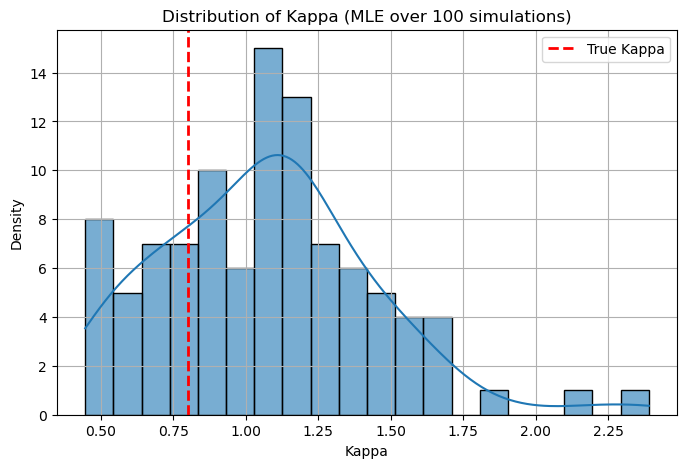

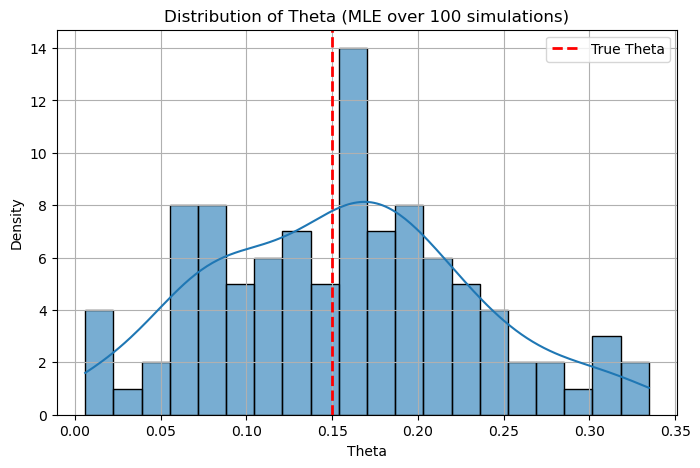

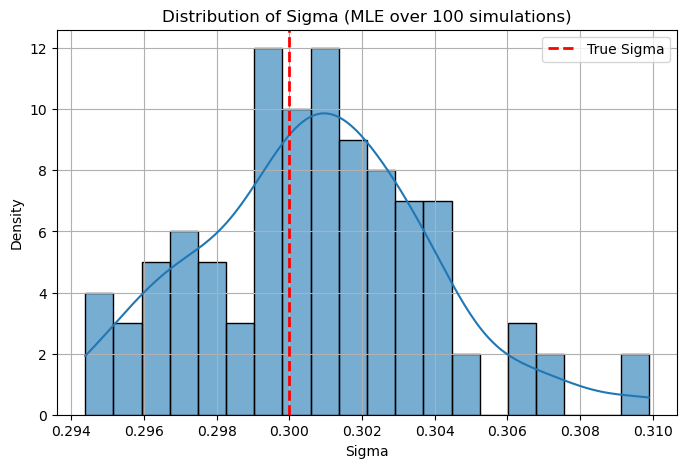

In [15]:
# Paramètres vrais
kappa_true = 0.8
theta_true = 0.15
sigma_true = 0.3
true_values = {'Kappa': kappa_true, 'Theta': theta_true, 'Sigma': sigma_true}

# Simulation et estimation MLE
n_simulations = 100
T = 20
n = 252 * T
X0 = 0.1

# Simulation et estimation MLE
n_simulations = 100
T = 20
n = 252 * T
X0 = 0.1

kappa_list = []
theta_list = []
sigma_list = []

vasicek_process = Vasicek(kappa_true, theta_true, sigma_true)

for _ in range(n_simulations):
    trajectories = vasicek_process.generate(X0, T, 1, n)
    trajectory = trajectories[0]

    kappa, theta, sigma = estimate_parameters_mle(trajectory=trajectory, T=T)
    kappa_list.append(kappa)
    theta_list.append(abs(theta))
    sigma_list.append(sigma)

# Structure des paramètres
params = {'Kappa': kappa_list, 'Theta': theta_list, 'Sigma': sigma_list}
param_names = list(params.keys())

# Créer les subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 ligne, 3 colonnes

for i, param_name in enumerate(param_names):
    ax = axes[i]
    values = params[param_name]
    
    sns.histplot(values, bins=20, kde=True, edgecolor='black', alpha=0.6, ax=ax)
    ax.axvline(true_values[param_name], color='red', linestyle='--', linewidth=2, label=f'True {param_name}')
    ax.set_xlabel(param_name)
    ax.set_ylabel('Density')
    ax.set_title(f'Distribution of {param_name}')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

In [25]:
def bootstrap_bias_correction(trajectory, T, X0, N_bootstrap=500):
    n = len(trajectory)

    # Étape 1 : Estimation MLE sur les vraies données
    kappa_hat, theta_hat, sigma_hat = estimate_parameters_mle(trajectory=trajectory, T=T)

    # Préparation de la simulation bootstrap via ta classe
    bootstrap_kappa = []
    bootstrap_theta = []
    bootstrap_sigma = []

    for _ in range(N_bootstrap):
        # Créer une instance de Vasicek avec les paramètres estimés
        vasicek_model = Vasicek(kappa_hat, theta_hat, sigma_hat)

        # Générer UNE trajectoire bootstrap
        traj_bootstrap = vasicek_model.generate(X0=X0, T=T, N=1, n=n)[0]  # [0] pour prendre la seule trajectoire

        try:
            # Réestimer les paramètres sur la trajectoire simulée
            kappa_star, theta_star, sigma_star = estimate_parameters_mle(trajectory=traj_bootstrap, T=T)

            bootstrap_kappa.append(kappa_star)
            bootstrap_theta.append(theta_star)
            bootstrap_sigma.append(sigma_star)
        except:
            continue  # Sauter les trajectoires invalides

    # Moyennes bootstrap
    mean_kappa = np.mean(bootstrap_kappa)
    mean_theta = np.mean(bootstrap_theta)
    mean_sigma = np.mean(bootstrap_sigma)

    # Correction du biais
    kappa_corr = 2 * kappa_hat - mean_kappa
    theta_corr = 2 * theta_hat - mean_theta
    sigma_corr = 2 * sigma_hat - mean_sigma

    return {
        "raw": (kappa_hat, theta_hat, sigma_hat),
        "corrected": (kappa_corr, theta_corr, sigma_corr),
        "bootstrap_samples": (bootstrap_kappa, bootstrap_theta, bootstrap_sigma)
    }


In [26]:
results = bootstrap_bias_correction(trajectory=trajectory, T=T, X0=X0, N_bootstrap=100)

print("\n--- Estimation MLE ---")
print("kappa =", results["raw"][0])
print("theta =", results["raw"][1])
print("sigma =", results["raw"][2])

print("\n--- Estimation corrigée (bootstrap) ---")
print("kappa_B =", results["corrected"][0])
print("theta_B =", results["corrected"][1])
print("sigma_B =", results["corrected"][2])

print("\n--- Valeurs vraies ---")
print("kappa_true =", kappa_true)
print("theta_true =", theta_true)
print("sigma_true =", sigma_true)



--- Estimation MLE ---
kappa = 1.2291342360249795
theta = -0.14876815897028975
sigma = 0.3305527193534324

--- Estimation corrigée (bootstrap) ---
kappa_B = 1.0585484479366247
theta_B = -0.4185305376895943
sigma_B = 0.33040021329240843

--- Valeurs vraies ---
kappa_true = 0.892
theta_true = 0.155
sigma_true = 0.33


## Comparison of MLE and GMM

Here we compare both the MLE and GMM

In [27]:
def MSE(params,true_params):
    return np.mean((params - true_params) ** 2)

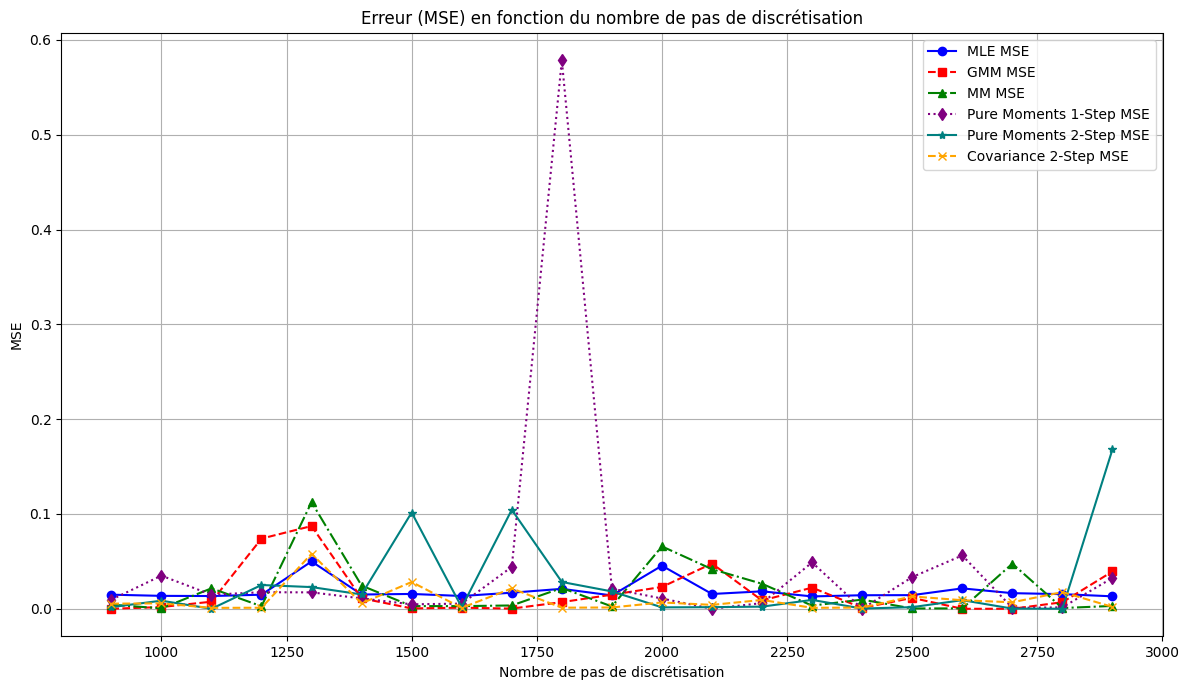

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# ========= Fonctions extérieures ==========



def estimate_covariance_2step(X, n, T, theta_emp, lags):
    # Step 1
    empirical_covs = np.array([empirical_covariance(X, n, T, theta_emp, h) for h in lags])

    def loss1(params):
        kappa, sigma = params
        model_covs = theoretical_covariance(lags, kappa, sigma)
        return np.sum((empirical_covs - model_covs) ** 2)

    best_loss = float('inf')
    best_params = None
    for _ in range(10):
        initial_guess = np.random.uniform(0.1, 1, size=2)
        res = minimize(loss1, initial_guess, method='L-BFGS-B', bounds=[(1e-7, None)]*2)
        if res.fun < best_loss:
            best_loss = res.fun
            best_params = res.x
    kappa_init, sigma_init = best_params

    # Step 2
    model_covs = theoretical_covariance(lags, kappa_init, sigma_init)
    errors = empirical_covs - model_covs
    S = np.outer(errors, errors)
    epsilon = 1e-6
    S += epsilon * np.eye(len(lags))
    W = np.linalg.inv(S)

    def loss2(params):
        kappa, sigma = params
        model_covs = theoretical_covariance(lags, kappa, sigma)
        diff = empirical_covs - model_covs
        return diff @ W @ diff

    best_loss2 = float('inf')
    best_params2 = None
    for _ in range(10):
        initial_guess = np.random.uniform(0.1, 1, size=2)
        res = minimize(loss2, initial_guess, method='L-BFGS-B', bounds=[(1e-7, None)]*2)
        if res.fun < best_loss2:
            best_loss2 = res.fun
            best_params2 = res.x

    kappa_final, sigma_final = best_params2
    return kappa_final, sigma_final

def process_trajectory(trajectory, n, T, kappa_true, theta_true, sigma_true, max_order, num_lags):
    theta_emp = np.mean(trajectory)
    lags = np.array([i * T / n for i in range(num_lags)])

    # MLE
    kappa_MLE, theta_MLE, sigma_MLE = estimate_parameters_mle(trajectory, T)
    mse_MLE = MSE(np.array([kappa_MLE, theta_MLE, sigma_MLE]), np.array([kappa_true, theta_true, sigma_true]))

    # GMM (cov simple)
    kappa_GMM, sigma_GMM = estimate_kappa_sigma(trajectory, n, T, theta_emp, lags)
    mse_GMM = MSE(np.array([kappa_GMM, theta_emp, sigma_GMM]), np.array([kappa_true, theta_true, sigma_true]))

    # MM (moment formulas)
    theta_MM, sigma2_MM, kappa_MM = moment_estimators(trajectory, T)
    mse_MM = MSE(np.array([kappa_MM, theta_MM, sigma2_MM]), np.array([kappa_true, theta_true, sigma_true]))

    # Pure Moments 1-Step
    theta_PM1, sigma2_PM1, kappa_PM1, _ = pure_moments_calibration(trajectory, max_order)
    mse_PM1 = MSE(np.array([kappa_PM1, theta_PM1, sigma2_PM1]), np.array([kappa_true, theta_true, sigma_true]))

    # Pure Moments 2-Step
    theta_PM2, sigma2_PM2, kappa_PM2 = pure_moments_calibration_2step(trajectory, max_order)
    mse_PM2 = MSE(np.array([kappa_PM2, theta_PM2, sigma2_PM2]), np.array([kappa_true, theta_true, sigma_true]))

    # Covariance 2-Step
    kappa_COV2, sigma_COV2 = estimate_covariance_2step(trajectory, n, T, theta_emp, lags)
    mse_COV2 = MSE(np.array([kappa_COV2, theta_emp, sigma_COV2]), np.array([kappa_true, theta_true, sigma_true]))

    return mse_MLE, mse_GMM, mse_MM, mse_PM1, mse_PM2, mse_COV2

def plot_errors(n_range, MLE_error, GMM_error, MM_error, pure_MM_error, pure_2_MM_error, cov_2_MM_error):
    fig, ax = plt.subplots(figsize=(12, 7))

    ax.plot(n_range, MLE_error, label='MLE MSE', marker='o', color='b')
    ax.plot(n_range, GMM_error, label='GMM MSE', marker='s', linestyle='dashed', color='r')
    ax.plot(n_range, MM_error, label='MM MSE', marker='^', linestyle='-.', color='g')
    ax.plot(n_range, pure_MM_error, label='Pure Moments 1-Step MSE', marker='d', linestyle=':', color='purple')
    ax.plot(n_range, pure_2_MM_error, label='Pure Moments 2-Step MSE', marker='*', linestyle='-', color='teal')
    ax.plot(n_range, cov_2_MM_error, label='Covariance 2-Step MSE', marker='x', linestyle='--', color='orange')

    ax.set_xlabel('Nombre de pas de discrétisation')
    ax.set_ylabel('MSE')
    ax.set_title('Erreur (MSE) en fonction du nombre de pas de discrétisation')
    ax.legend()
    ax.grid(True)

    plt.tight_layout()
    plt.show()


# ========= Code Principal ==========

n_range = range(900, 3000, 100)

N = 1
X0 = 0.05
kappa_true = 0.9289
theta_true = 0.09587
sigma_true = 0.03389

MLE_error = []
GMM_error = []
MM_error = []
pure_MM_error = []
pure_2_MM_error = []
cov_2_MM_error = []

num_lags = 6
max_order = 6

for n in n_range:
    T = 100
    vasicek_process = Vasicek(kappa_true, theta_true, sigma_true)
    trajectory = vasicek_process.generate(X0, T, N, n)[0]

    mse_MLE, mse_GMM, mse_MM, mse_PM1, mse_PM2, mse_COV2 = process_trajectory(
        trajectory, n, T, kappa_true, theta_true, sigma_true, max_order, num_lags
    )

    MLE_error.append(mse_MLE)
    GMM_error.append(mse_GMM)
    MM_error.append(mse_MM)
    pure_MM_error.append(mse_PM1)
    pure_2_MM_error.append(mse_PM2)
    cov_2_MM_error.append(mse_COV2)

# === Plot final ===
plot_errors(n_range, MLE_error, GMM_error, MM_error, pure_MM_error, pure_2_MM_error, cov_2_MM_error)


5000
5555
6111
6666
7222
7777
8333
8888
9444
10000


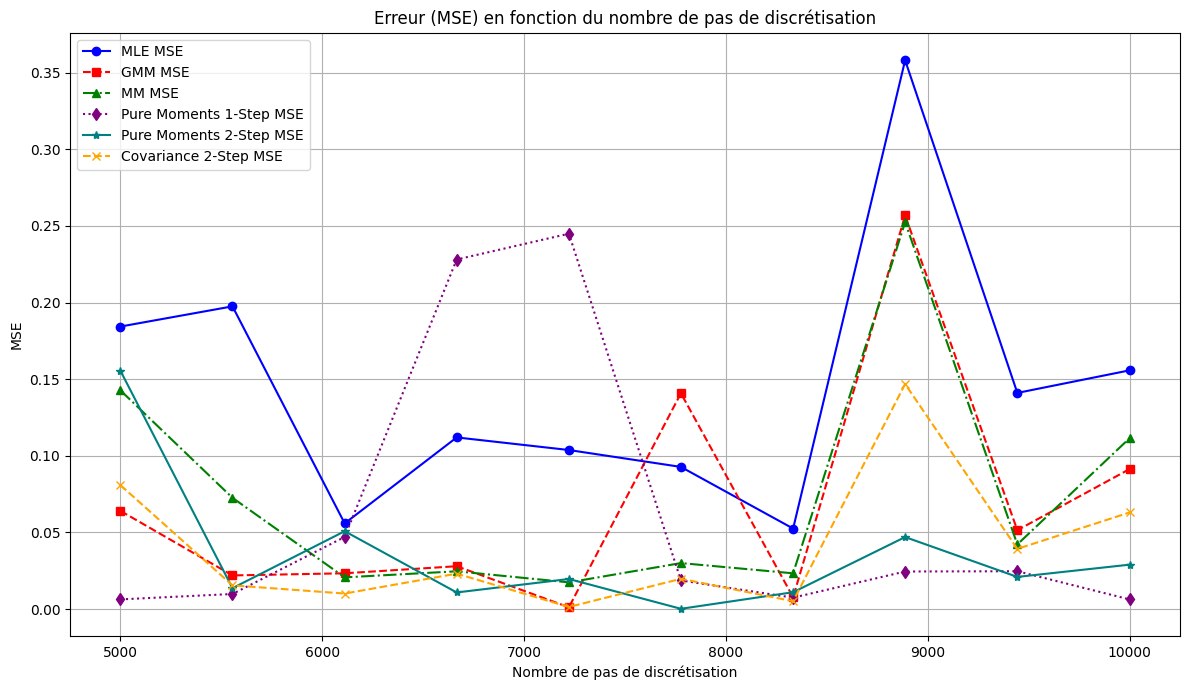

In [29]:
n_range = np.linspace(250*20, 500*20, 10, dtype=int)  # 5 valeurs entre 250 et 1000

N = 100
T = 20
X0 = 0.05
kappa_true = 0.9289
theta_true = 0.2587
sigma_true = 0.3389

MLE_error = []
GMM_error = []
MM_error = []
pure_MM_error = []
pure_2_MM_error = []
cov_2_MM_error = []

num_lags = 10
max_order = 6

for n in n_range:
    print(n)
    vasicek_process = Vasicek(kappa_true, theta_true, sigma_true)
    trajectory = vasicek_process.generate(X0, T, N, n)[0]

    mse_MLE, mse_GMM, mse_MM, mse_PM1, mse_PM2, mse_COV2 = process_trajectory(
        trajectory, n, T, kappa_true, theta_true, sigma_true, max_order, num_lags
    )

    MLE_error.append(mse_MLE)
    GMM_error.append(mse_GMM)
    MM_error.append(mse_MM)
    pure_MM_error.append(mse_PM1)
    pure_2_MM_error.append(mse_PM2)
    cov_2_MM_error.append(mse_COV2)

# === Plot final ===
plot_errors(n_range, MLE_error, GMM_error, MM_error, pure_MM_error, pure_2_MM_error, cov_2_MM_error)



/tmp/ipykernel_226675/310495951.py:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([error], labels=[label], patch_artist=True)


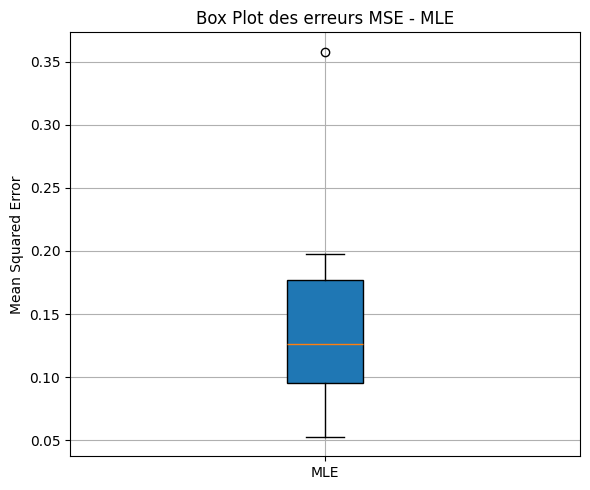

/tmp/ipykernel_226675/310495951.py:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([error], labels=[label], patch_artist=True)


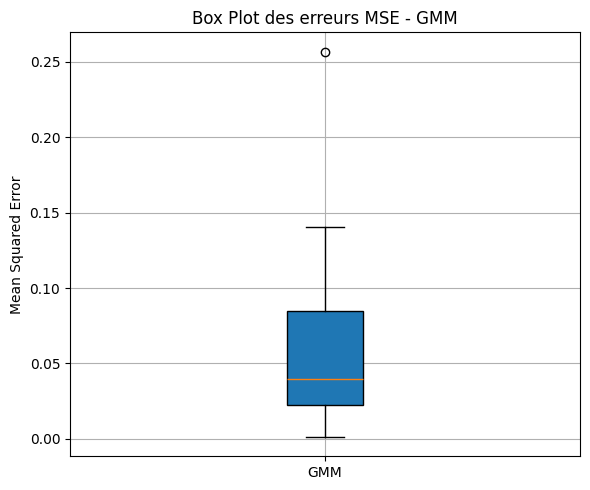

/tmp/ipykernel_226675/310495951.py:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([error], labels=[label], patch_artist=True)


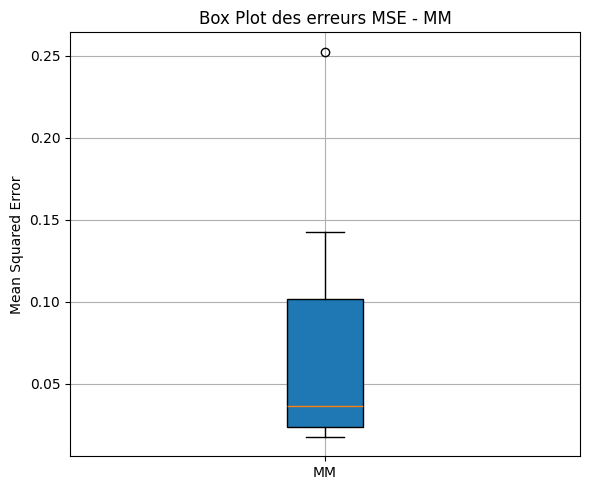

/tmp/ipykernel_226675/310495951.py:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([error], labels=[label], patch_artist=True)


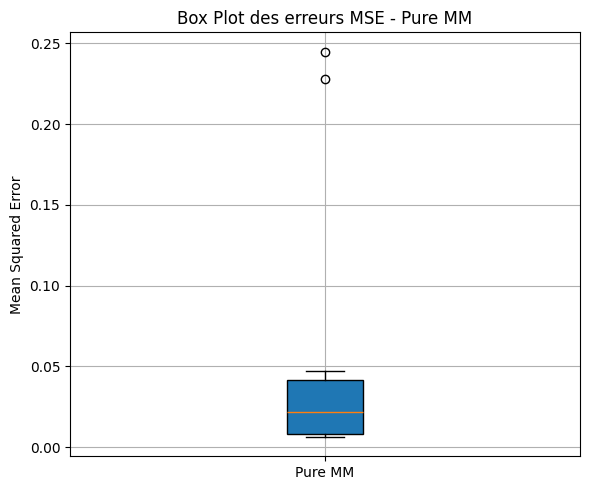

/tmp/ipykernel_226675/310495951.py:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([error], labels=[label], patch_artist=True)


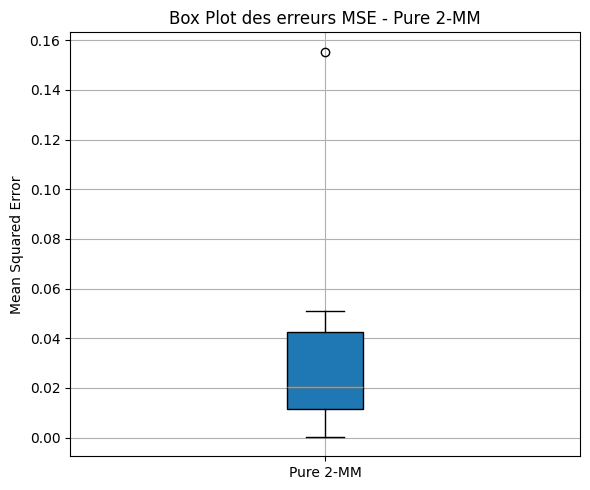

/tmp/ipykernel_226675/310495951.py:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([error], labels=[label], patch_artist=True)


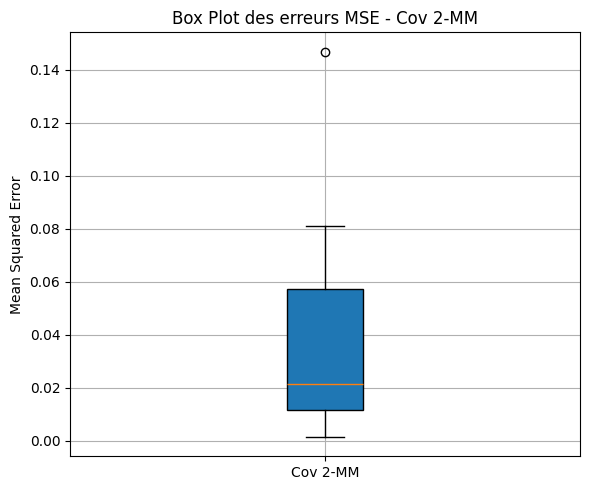

In [30]:

# Assure que les erreurs sont bien des vecteurs 1D
MLE_error = np.array(MLE_error).flatten()
GMM_error = np.array(GMM_error).flatten()
MM_error = np.array(MM_error).flatten()
pure_MM_error = np.array(pure_MM_error).flatten()
pure_2_MM_error = np.array(pure_2_MM_error).flatten()
cov_2_MM_error = np.array(cov_2_MM_error).flatten()

# Toutes les erreurs et leurs étiquettes
all_errors = [
    MLE_error,
    GMM_error,
    MM_error,
    pure_MM_error,
    pure_2_MM_error,
    cov_2_MM_error
]

labels = ["MLE", "GMM", "MM", "Pure MM", "Pure 2-MM", "Cov 2-MM"]

# Afficher un box plot par méthode
for error, label in zip(all_errors, labels):
    plt.figure(figsize=(6, 5))
    plt.boxplot([error], labels=[label], patch_artist=True)
    plt.title(f"Box Plot des erreurs MSE - {label}")
    plt.ylabel("Mean Squared Error")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


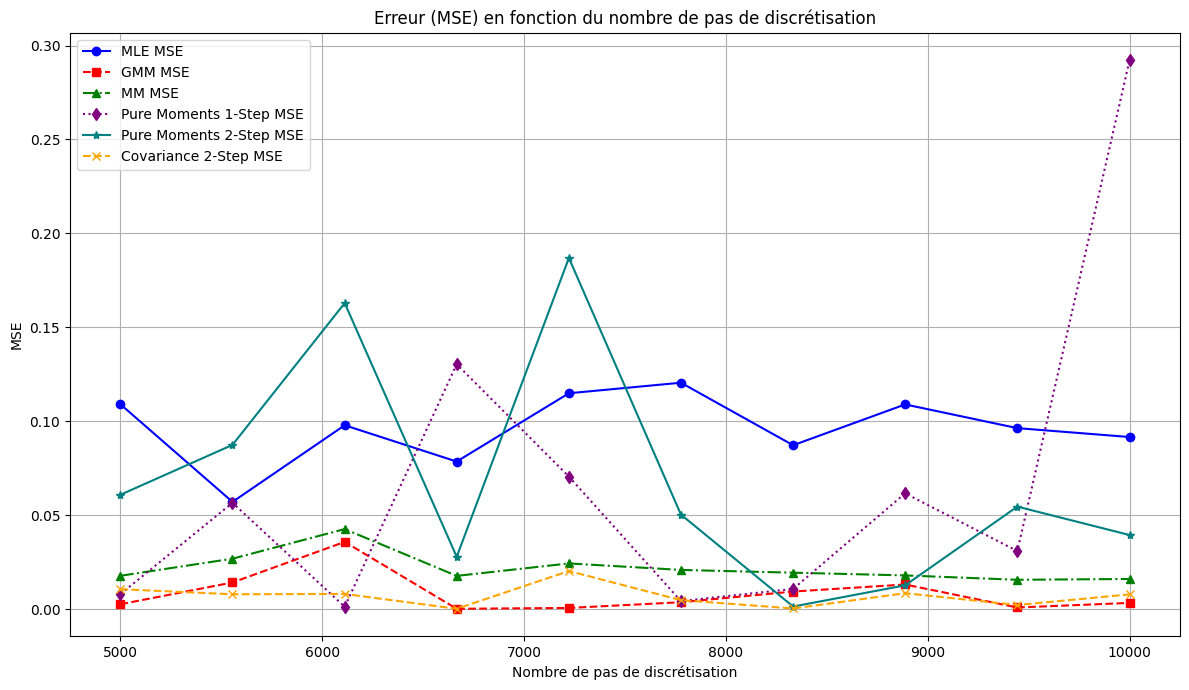

In [31]:
n_range = np.linspace(250*20, 500*20, 10, dtype=int)  # 5 valeurs entre 250 et 1000

N = 100
T = 20
X0 = 0.05
kappa_true = 0.9289
theta_true = 0.2587
sigma_true = 0.3389

MLE_error = []
GMM_error = []
MM_error = []
pure_MM_error = []
pure_2_MM_error = []
cov_2_MM_error = []

num_lags = 10
max_order = 6

for n in n_range:
    vasicek_process = Vasicek(kappa_true, theta_true, sigma_true)
    trajectory = vasicek_process.generate(X0, T, N, n)[0]
    trajectory+=np.random.normal(0,0.001,n)
    mse_MLE, mse_GMM, mse_MM, mse_PM1, mse_PM2, mse_COV2 = process_trajectory(
        trajectory, n, T, kappa_true, theta_true, sigma_true, max_order, num_lags
    )

    MLE_error.append(mse_MLE)
    GMM_error.append(mse_GMM)
    MM_error.append(mse_MM)
    pure_MM_error.append(mse_PM1)
    pure_2_MM_error.append(mse_PM2)
    cov_2_MM_error.append(mse_COV2)

# === Plot final ===
plot_errors(n_range, MLE_error, GMM_error, MM_error, pure_MM_error, pure_2_MM_error, cov_2_MM_error)

